# EDA

## Imports, intro sobre el EDA, objetivos, etc.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import warnings

In [109]:
# Desactivamos los avisos
warnings.filterwarnings('ignore')

In [110]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df_1900_2021 = pd.read_csv('data/1900_2021_DISASTERS.csv')

df_1900_2021.head(10)

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,IND,Southern Asia,Asia,Bengal,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,GTM,Central America,Americas,"Quezaltenango, San Marcos",NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,NaN,8.0,Richter,14,-91,20:20,NaN,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
5,1903,6,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,CAN,Northern America,Americas,"Frank, Alberta",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903,4.0,29.0,1903,4.0,29.0,76.0,23.0,NaN,NaN,23.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
6,1903,12,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mount Karthala,Comoros (the),COM,Eastern Africa,Africa,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903,NaN,NaN,1903,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
7,1904,3,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,Chittagong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1904,11.0,NaN,1904,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
8,1905,5,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,CAN,Northern America,Americas,"Spence's Bridge, British Columbia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1905,8.0,13.0,1905,8.0,13.0,18.0,18.0,NaN,NaN,18.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
9,1905,3,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,India,IND,Southern Asia,Asia,Kangra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,Richter,32.04,76.16,06:20,NaN,1905,4.0,4.0,1905,4.0,4.0,20000.0,NaN,NaN,NaN,NaN,NaN,25000.0,3.479379,NaN,NaN,NaN,NaN


In [111]:
df_1970_2021 = pd.read_csv('data/1970_2021_DISASTERS.csv')

df_1970_2021.head(10)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Argentina,ARG,South America,Americas,Mendoza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,1.0,4.0,1970,1.0,4.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,1.0,NaN,1970,1.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Benin,BEN,Western Africa,Africa,Atacora region,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,9.0,NaN,1970,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,11.0,12.0,1970,11.0,12.0,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,4.0,13.0,1970,4.0,13.0,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
5,1970-0035-BGD,1970,35,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,7.0,NaN,1970,7.0,NaN,NaN,NaN,10000000.0,NaN,10000000.0,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
6,1970-0058-BGD,1970,58,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,Bay of Bengal districts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,10.0,23.0,1970,10.0,23.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
7,1970-9005-BRA,1970,9005,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Brazil,BRA,South America,Americas,Northeast,NaN,NaN,NaN,Yes,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,8.0,NaN,1970,NaN,NaN,NaN,NaN,10000000.0,NaN,10000000.0,NaN,NaN,100.0,15.001282,NaN,NaN,NaN,NaN
8,1970-0037-BRA,1970,37,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Brazil,BRA,South America,Americas,"Recife, South Pernambuco",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,7.0,21.0,1970,7.0,21.0,172.0,NaN,104371.0,NaN,104371.0,NaN,NaN,46000.0,15.001282,NaN,NaN,NaN,NaN
9,1970-0054-BRB,1970,54,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Barbados,BRB,Caribbean,Americas,Entire Isl.,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,10.0,2.0,1970,10.0,2.0,3.0,10.0,200.0,NaN,210.0,NaN,NaN,500.0,15.001282,NaN,NaN,NaN,NaN


## Tabla explicativa de las variables

| Nombre Variable | Descripción |
|---|---|
| Dis No | Identificador del evento, compuesto por año + secuencia + código país |
| Year | Año en que tuvo lugar el evento |
| Seq | Número de secuencia del evento |
| Glide | Número de identificación global del evento (GLIDE) |
| Disaster Group | Categoría general del evento |
| Disaster Subgroup | Subcategoría del evento |
| Disaster Subtype | Subtipo del evento, más específico que la subcategoría |
| Disaster Subsubtype | Subsubtipo del evento, más específico que el subtipo |
| Event Name | Nombre o apodo del evento |
| Country | País en el que tuvo lugar el evento |
| ISO | Código ISO del país |
| Region | Región donde tuvo lugar el evento |
| Continent | Continente donde tuvo lugar el evento |
| Location | Ubicación concreta donde ocurrió el evento |
| Origin | Origen o causas principales por las que tuvo lugar el evento |
| Associated Dis | Desastres asociados al evento principal |
| Associated Dis2 | Desastres asociados al evento principal |
| OFDA Response | Si ha habido o no respuesta de la OFDA (Oficina de Asistencia para Desastres en el Extranjero) |
| Appeal | Ha habido o no declaración oficial |
| Declaration | Ha habido o no declaración oficial |
| Aid Contribution | Ayuda económica en miles de dólares |
| Dis Mag Value | Valor de magnitud del evento |
| Dis Mag Scale | Escala de magnitud del evento |
| Latitude | Coordenadas del evento (lat) |
| Longitude | Coordenadas del evento (long) |
| Local Time | Hora local en la que tuvo lugar el evento |
| Start Year | Año de inicio del evento |
| Start Month | Mes de inicio del evento |
| Start Day | Día de inicio del evento |
| End Year | Año de finalización del evento |
| End Month | Mes de finalización del evento |
| End Day | Día de finalización del evento |
| Total Deaths | Número total de fallecidos - VARIABLE OBJETIVO |
| No Injured | Número de heridos |
| No Affected | Número de afectados |
| No Homeless | Número de personas que quedaron sin hogar |
| Total Affected | Total de afectados (heridos + afectados + sin hogar) |
| Reconstruction Costs ('000 USD) | Costes de reconstrucción en miles de dólares |
| Insured Damages ('000 USD) | Daños económicos cubiertos en miles de dólares |
| Total Damages ('000 USD) | Daños económicos totales en miles de dólares |
| CPI | Índice de Precios al Consumo del país afectado en el momento del evento ¿?|
| Adm Level | Nivel administrativo de la ubicación |
| Admin1 Code | Código localización |
| Admin2 Code | Código localización |
| Geo Locations | Información adicional geolocalización |

In [8]:
print(df_1900_2021.shape)
print(df_1970_2021.shape)

(16126, 45)
(14644, 47)


Antes de unir o "mergear" ambos datasets, vamos a confirmar si merece la pena hacerlo o no. En primer lugar, de 1900 a 1970 tenemos solamente 2.000 registros adicionales, y posiblemente, dadas las fechas en las que pudieron haber sido registrados los eventos o de las que se haya podido rescatar información suficiente, tendrá un número elevado de valores faltantes o nulos. 

In [9]:
cols_df1 = set(df_1900_2021.columns)
cols_df2 = set(df_1970_2021.columns)

comunes = cols_df1.intersection(cols_df2)

uniques_df1 = cols_df1 - cols_df2

uniques_df2 = cols_df2 - cols_df1

print("Comunes:", comunes)
print("Solo en dataset 1:", uniques_df1)
print("Solo en dataset 2:", uniques_df2)

Comunes: {'Total Deaths', 'Disaster Subtype', "Insured Damages ('000 US$)", 'Associated Dis', 'Continent', 'Declaration', 'Local Time', 'End Year', 'Region', 'No Affected', 'ISO', 'End Day', 'OFDA Response', 'Total Affected', 'Start Month', 'Disaster Subsubtype', 'Disaster Type', 'Event Name', "Total Damages ('000 US$)", 'Admin2 Code', 'Start Day', 'Year', 'Appeal', 'Origin', 'Aid Contribution', 'Disaster Subgroup', 'No Injured', 'Glide', 'Location', 'Country', 'Latitude', 'Associated Dis2', 'Adm Level', 'End Month', 'CPI', 'Longitude', 'Seq', 'Dis Mag Scale', 'No Homeless', 'Geo Locations', 'Start Year', 'River Basin', 'Dis Mag Value', 'Disaster Group', 'Admin1 Code'}
Solo en dataset 1: set()
Solo en dataset 2: {'Dis No', "Reconstruction Costs ('000 US$)"}


Vemos que las 2 variables adicionales con las que cuenta el dataset de 1970-2021 son "Reconstruction Costs" y "Dis No", es decir, los costes de reconstrucción en miles de dólares, y el identificador del registro, que está compuesto por el año, los dígitos de la secuencia del evento y el código país del país donde ocurrió el evento. En principio, esta variable no aparenta tener relevancia para el análisis ni para la construcción de modelos predictivos. 

In [10]:
missings_df1 = df_1900_2021.isnull().mean() * 100

missings_df1.sort_values(ascending=False)

Aid Contribution              95.801811
Associated Dis2               95.615776
Disaster Subsubtype           93.321344
Insured Damages ('000 US$)    93.203522
Local Time                    93.160114
River Basin                   92.019100
Glide                         90.195957
OFDA Response                 89.495225
No Homeless                   84.931167
Appeal                        84.069205
Latitude                      83.077018
Longitude                     83.058415
Declaration                   79.809004
Associated Dis                79.238497
Origin                        76.472777
Event Name                    76.057299
No Injured                    75.846459
Admin2 Code                   75.387573
Admin1 Code                   71.592459
Dis Mag Value                 69.329034
Total Damages ('000 US$)      67.474885
Geo Locations                 51.265038
Adm Level                     51.265038
No Affected                   42.825251
Total Deaths                  29.226095


In [11]:
missings_df2 = df_1970_2021.isnull().mean() * 100

missings_df2.sort_values(ascending=False)

Reconstruction Costs ('000 US$)    99.788309
Aid Contribution                   95.376946
Associated Dis2                    95.233543
Local Time                         94.776017
Disaster Subsubtype                92.870800
Insured Damages ('000 US$)         92.529364
River Basin                        91.225075
OFDA Response                      90.098334
Glide                              89.203769
No Homeless                        84.642174
Latitude                           84.082218
Longitude                          84.054903
Appeal                             83.337886
Declaration                        78.646545
Associated Dis                     77.929527
Event Name                         75.109260
No Injured                         75.068287
Origin                             74.187380
Admin2 Code                        72.924064
Dis Mag Value                      68.799508
Admin1 Code                        68.717564
Total Damages ('000 US$)           66.791860
Adm Level 

El porcentaje de valores faltantes es exorbitado en ambos casos, si bien en el caso del dataset de 1900-2021, los pocos registros adicionales que tiene suponen mayores valores faltantes, por lo que no parece tener mucho sentido unir ambos datasets. A continuación, vamos a centrarnos en el dataset más actual que transcurre entre 1970 y 2021.

Por su parte, las columnas con un elevadísimo número de valores faltantes y las que no aporten información de calidad o de valor ni para el análisis ni para la futura creación del modelo van a ser eliminadas directamente.

In [12]:
# Definimos una función para eliminar las columnas que tengan > 80% NAN

def drop_cols_nan(df, limit=0.8):
    ratio_nan = df.isna().mean()
    drop_cols = ratio_nan[ratio_nan > limit].index.tolist()
    print(f"Columnas eliminadas (más del {limit*100:.0f}% de NA):")
    print(drop_cols)
    return df.drop(columns=drop_cols)

In [13]:
df_clean = drop_cols_nan(df_1970_2021, limit=0.8)

Columnas eliminadas (más del 80% de NA):
['Glide', 'Disaster Subsubtype', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Aid Contribution', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'No Homeless', "Reconstruction Costs ('000 US$)", "Insured Damages ('000 US$)"]


In [14]:
df_clean.nunique()

Dis No                      14644
Year                           52
Seq                          1265
Disaster Group                  1
Disaster Subgroup               6
Disaster Type                  14
Disaster Subtype               27
Event Name                   1488
Country                       228
ISO                           228
Region                         23
Continent                       5
Location                    11995
Origin                        660
Associated Dis                 30
Declaration                     2
Dis Mag Value                1860
Dis Mag Scale                   5
Start Year                     52
Start Month                    12
Start Day                      31
End Year                       52
End Month                      12
End Day                        31
Total Deaths                  710
No Injured                    713
No Affected                  3492
Total Affected               4901
Total Damages ('000 US$)     1519
CPI           

In [15]:
df_clean2 = df_clean.drop(['Seq',
                           'Admin1 Code',
                           'Admin2 Code',
                           'Geo Locations',
                           'Dis No',
                           'Location',
                           'Origin'],
                          axis=1)

df_clean2.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Event Name', 'Country', 'ISO', 'Region',
       'Continent', 'Associated Dis', 'Declaration', 'Dis Mag Value',
       'Dis Mag Scale', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'Total Affected', 'Total Damages ('000 US$)', 'CPI', 'Adm Level'],
      dtype='object')

In [16]:
# Limpiamos la variable objetivo eliminando los valores faltantes. 

df_clean3 = df_clean2.dropna(subset=["Total Deaths"])

In [17]:
df_clean3.shape

(10199, 27)

In [18]:
df_clean3.isnull().mean() * 100

Year                         0.000000
Disaster Group               0.000000
Disaster Subgroup            0.000000
Disaster Type                0.000000
Disaster Subtype            17.962545
Event Name                  73.781743
Country                      0.000000
ISO                          0.000000
Region                       0.000000
Continent                    0.000000
Associated Dis              75.487793
Declaration                 77.635062
Dis Mag Value               65.673105
Dis Mag Scale                7.608589
Start Year                   0.000000
Start Month                  0.764781
Start Day                   15.874105
End Year                     0.000000
End Month                    0.970683
End Day                     15.148544
Total Deaths                 0.000000
No Injured                  68.712619
No Affected                 39.386214
Total Affected              22.129621
Total Damages ('000 US$)    63.055201
CPI                          1.872733
Adm Level   

In [19]:
df_clean4 = df_clean3.drop(['Adm Level',
                            'Associated Dis',
                            'Declaration',
                            'No Injured',
                            'No Affected'],
                            axis=1)

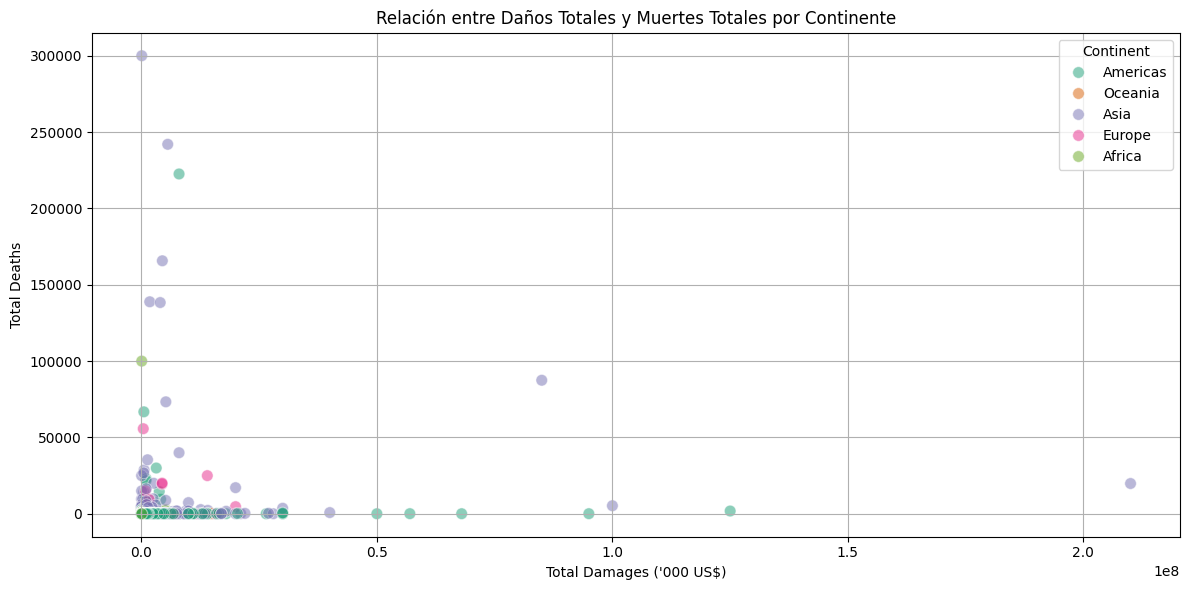

In [20]:
df_plot = df_clean4[["Continent", "Total Damages ('000 US$)", "Total Deaths"]]

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_plot,
    x="Total Damages ('000 US$)",
    y="Total Deaths",
    hue="Continent",
    palette="Dark2",
    s=70,
    alpha=0.5)

plt.title("Relación entre Daños Totales y Muertes Totales por Continente")
plt.xlabel("Total Damages ('000 US$)")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df_clean4.isnull().mean() * 100

Year                         0.000000
Disaster Group               0.000000
Disaster Subgroup            0.000000
Disaster Type                0.000000
Disaster Subtype            17.962545
Event Name                  73.781743
Country                      0.000000
ISO                          0.000000
Region                       0.000000
Continent                    0.000000
Dis Mag Value               65.673105
Dis Mag Scale                7.608589
Start Year                   0.000000
Start Month                  0.764781
Start Day                   15.874105
End Year                     0.000000
End Month                    0.970683
End Day                     15.148544
Total Deaths                 0.000000
Total Affected              22.129621
Total Damages ('000 US$)    63.055201
CPI                          1.872733
dtype: float64

In [22]:
# Sacamos la frecuencia de los tokens más habituales

event_names = df_clean4['Event Name'].dropna().astype(str).tolist()

tokens = []
for name in event_names:
    clean_text = re.sub(r'[^\w\s]', '', name.lower())
    tokens.extend(clean_text.split())

# Contar frecuencia de tokens
token_counts = Counter(tokens)
token_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Frequency'])
token_df = token_df.sort_values(by='Frequency', ascending=False)

print(token_df.head(15))

             Token  Frequency
2          cholera        448
788       tropical        204
789          storm        163
218        typhoon        145
801        cyclone        127
124      hurricane        124
84           fever        111
235         dengue        101
422          acute         84
423       syndrome         74
384        disease         69
383  meningococcal         65
495     diarrhoeal         38
89          yellow         37
523         watery         37


In [23]:
df_clean4['Disaster Subtype'].value_counts()

Disaster Subtype
Riverine flood                      1954
Tropical cyclone                    1585
Convective storm                     751
Ground movement                      742
Bacterial disease                    675
Flash flood                          626
Landslide                            499
Viral disease                        388
Cold wave                            246
Heat wave                            179
Forest fire                          123
Avalanche                            108
Extra-tropical storm                  84
Mudslide                              71
Coastal flood                         54
Ash fall                              52
Drought                               52
Severe winter conditions              47
Land fire (Brush, Bush, Pasture)      46
Tsunami                               37
Parasitic disease                     34
Rockfall                              10
Subsidence                             2
Pyroclastic flow                       1

In [24]:
keyword_to_subtype = {
    # Bacterial disease
    'cholera': 'Bacterial disease',
    'bloody': 'Bacterial disease',
    'diarrhoeal': 'Bacterial disease',
    'diarroheal': 'Bacterial disease',
    'diarrhoea': 'Bacterial disease',
    'diarrhoel': 'Bacterial disease',
    'diarroeal': 'Bacterial disease',
    'diarrheal': 'Bacterial disease',
    'diarroheic': 'Bacterial disease',
    'diarroea': 'Bacterial disease',
    'diarrohoea': 'Bacterial disease',
    'diarrhoeaic': 'Bacterial disease',
    'diarroehic': 'Bacterial disease',
    'diarroheic': 'Bacterial disease',
    'watery': 'Bacterial disease',
    # Viral disease
    'fever': 'Viral disease',
    'dengue': 'Viral disease',
    'acute': 'Viral disease',
    'syndrome': 'Viral disease',
    'yellow': 'Viral disease',
    'disease': 'Viral disease',
    # Tropical cyclone
    'tropical': 'Tropical cyclone',
    'cyclone': 'Tropical cyclone',
    'hurricane': 'Tropical cyclone',
    'typhoon': 'Tropical cyclone',
    # Convective storm
    'storm': 'Convective storm'}


In [25]:
df_prueba5 = df_clean4.copy()
df_prueba5.shape

(10199, 22)

In [26]:
cols_to_str = ['Event Name', 'Disaster Subtype']
df_prueba5[cols_to_str] = df_prueba5[cols_to_str].astype(str)

In [27]:
df_prueba5['Disaster Subtype'] = df_prueba5['Disaster Subtype'].replace('nan', np.nan)

In [28]:
def fill_disaster_subtype(row):
    if pd.isna(row['Disaster Subtype']) or row['Disaster Subtype'].strip() == '':
        event = row['Event Name'].lower()
        for keyword, subtype in keyword_to_subtype.items():
            if keyword in event:
                return subtype
    return row['Disaster Subtype']

df_prueba5['Disaster Subtype'] = df_prueba5.apply(fill_disaster_subtype, axis=1)

In [29]:
df_prueba5.isnull().mean() * 100
# Conseguimos salvar 0,65% de datos faltantes en la variable 'Disaster Subtype'

Year                         0.000000
Disaster Group               0.000000
Disaster Subgroup            0.000000
Disaster Type                0.000000
Disaster Subtype            17.384057
Event Name                   0.000000
Country                      0.000000
ISO                          0.000000
Region                       0.000000
Continent                    0.000000
Dis Mag Value               65.673105
Dis Mag Scale                7.608589
Start Year                   0.000000
Start Month                  0.764781
Start Day                   15.874105
End Year                     0.000000
End Month                    0.970683
End Day                     15.148544
Total Deaths                 0.000000
Total Affected              22.129621
Total Damages ('000 US$)    63.055201
CPI                          1.872733
dtype: float64

In [30]:
# Creamos una columna de fecha completa de inicio y de fin del evento

df_prueba5['start_date'] = pd.to_datetime(
    df_prueba5[['Start Year', 'Start Month', 'Start Day']].rename(
        columns={'Start Year': 'year', 'Start Month': 'month', 'Start Day': 'day'}
    ),
    errors='coerce'
)

df_prueba5['end_date'] = pd.to_datetime(
    df_prueba5[['End Year', 'End Month', 'End Day']].rename(
        columns={'End Year': 'year', 'End Month': 'month', 'End Day': 'day'}
    ),
    errors='coerce'
)

In [31]:
df_prueba5['dis_duration'] = df_prueba5['end_date'] - df_prueba5['start_date']

In [32]:
# Convertimos duración a días
df_prueba5['dis_duration_days'] = df_prueba5['dis_duration'].dt.days

In [33]:
df_prueba5.dtypes

Year                                  int64
Disaster Group                       object
Disaster Subgroup                    object
Disaster Type                        object
Disaster Subtype                     object
Event Name                           object
Country                              object
ISO                                  object
Region                               object
Continent                            object
Dis Mag Value                       float64
Dis Mag Scale                        object
Start Year                            int64
Start Month                         float64
Start Day                           float64
End Year                              int64
End Month                           float64
End Day                             float64
Total Deaths                        float64
Total Affected                      float64
Total Damages ('000 US$)            float64
CPI                                 float64
start_date                   dat

In [34]:
cat_cols = ['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
            'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Dis Mag Scale']
df_prueba5[cat_cols] = df_prueba5[cat_cols].astype('category')

In [35]:
df_prueba5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 0 to 14643
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Year                      10199 non-null  int64          
 1   Disaster Group            10199 non-null  category       
 2   Disaster Subgroup         10199 non-null  category       
 3   Disaster Type             10199 non-null  category       
 4   Disaster Subtype          8426 non-null   category       
 5   Event Name                10199 non-null  category       
 6   Country                   10199 non-null  category       
 7   ISO                       10199 non-null  category       
 8   Region                    10199 non-null  category       
 9   Continent                 10199 non-null  category       
 10  Dis Mag Value             3501 non-null   float64        
 11  Dis Mag Scale             9423 non-null   category       
 12  Start Yea

In [36]:
df_prueba5.describe()

,Year,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages ('000 US$),CPI,start_date,end_date,dis_duration,dis_duration_days
count,10199.000000,3.501000e+03,10199.000000,10121.000000,8580.000000,10199.000000,10100.000000,8654.000000,10199.000000,7.942000e+03,3.768000e+03,10008.000000,8579,8649,8497,8497.000000
mean,2001.995588,5.881678e+04,2002.000196,6.499555,15.189044,2002.030395,6.618812,15.807603,361.813119,7.093836e+05,9.055108e+05,69.573299,2003-09-26 12:12:40.368341248,2003-10-19 11:51:45.515088640,10 days 10:20:15.958573614,10.430740
min,1970.000000,-5.700000e+01,1970.000000,1.000000,1.000000,1970.000000,1.000000,1.000000,1.000000,1.000000e+00,2.000000e+00,15.001282,1970-01-01 00:00:00,1970-01-01 00:00:00,0 days 00:00:00,0.000000
25%,1994.000000,8.000000e+00,1994.000000,4.000000,7.000000,1994.000000,4.000000,8.000000,5.000000,6.650000e+02,1.094125e+04,57.271483,1996-06-19 00:00:00,1996-07-26 00:00:00,0 days 00:00:00,0.000000
50%,2003.000000,2.000000e+02,2003.000000,7.000000,15.000000,2003.000000,7.000000,16.000000,16.000000,6.603000e+03,8.799500e+04,71.078198,2005-05-21 00:00:00,2005-06-12 00:00:00,1 days 00:00:00,1.000000
75%,2012.000000,2.042200e+04,2012.000000,9.000000,23.000000,2012.000000,9.000000,23.000000,50.000000,6.697100e+04,4.200000e+05,86.912465,2013-05-01 12:00:00,2013-05-28 00:00:00,6 days 00:00:00,6.000000
max,2021.000000,1.302587e+07,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,300000.000000,3.000000e+08,2.100000e+08,100.000000,2021-10-07 00:00:00,2021-10-07 00:00:00,955 days 00:00:00,955.000000
std,12.375320,3.617961e+05,12.375665,3.374958,8.979295,12.382591,3.340445,8.867807,6495.045853,7.063373e+06,5.532790e+06,21.210647,NaN,NaN,39 days 10:37:44.032844541,39.442871


In [37]:
df_prueba5.describe(include='category')

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Country,ISO,Region,Continent,Dis Mag Scale
count,10199,10199,10199,8426,10199,10199,10199,10199,10199,9423
unique,1,5,12,25,1203,219,219,23,5,5
top,Natural,Hydrological,Flood,Riverine flood,nan,China,CHN,Southern Asia,Asia,Km2
freq,10199,4488,3810,1954,7525,719,719,1626,4606,4051


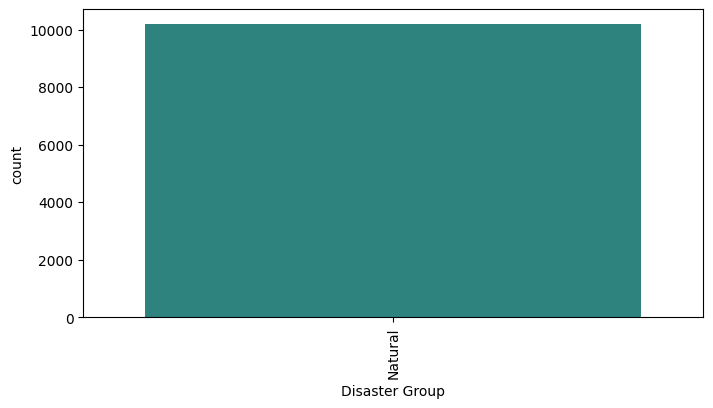

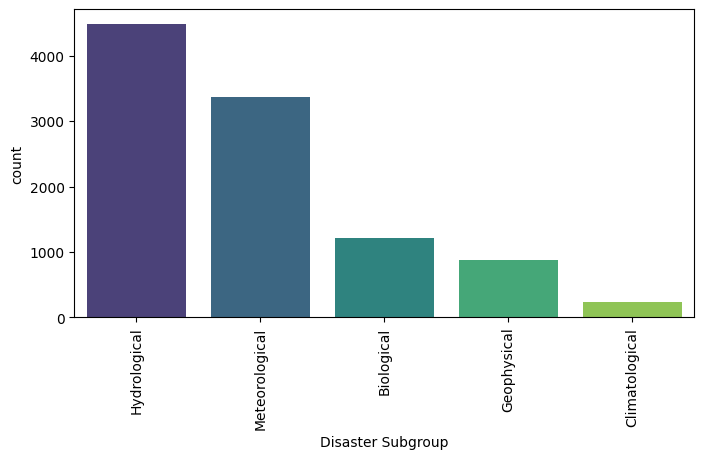

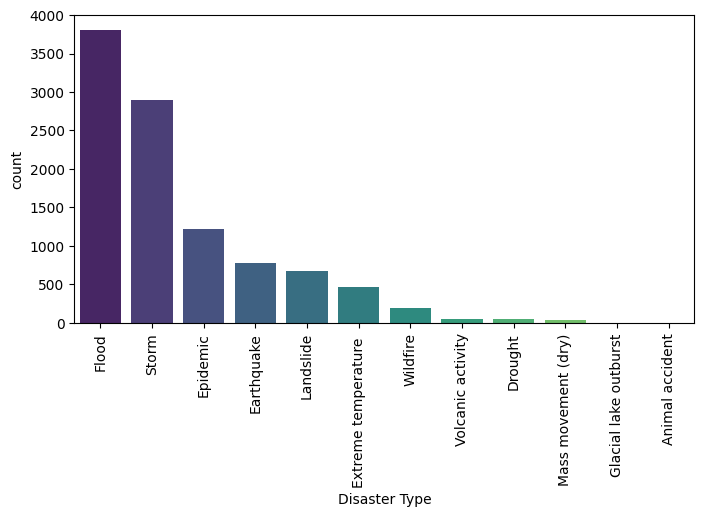

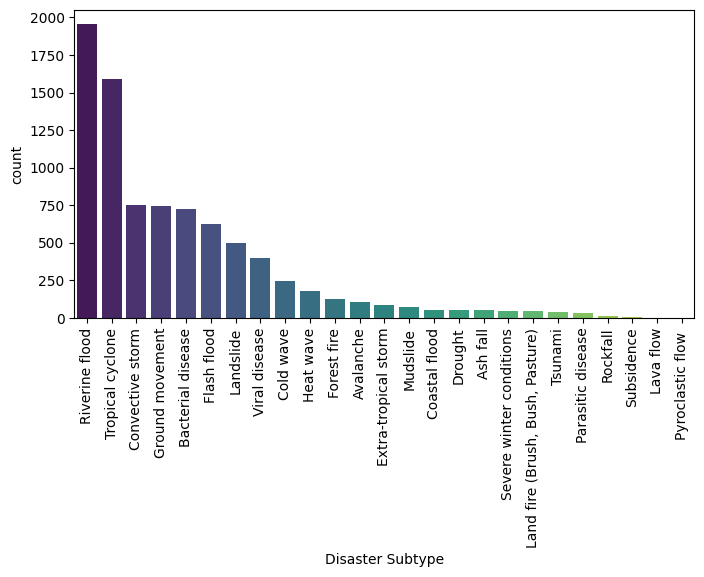

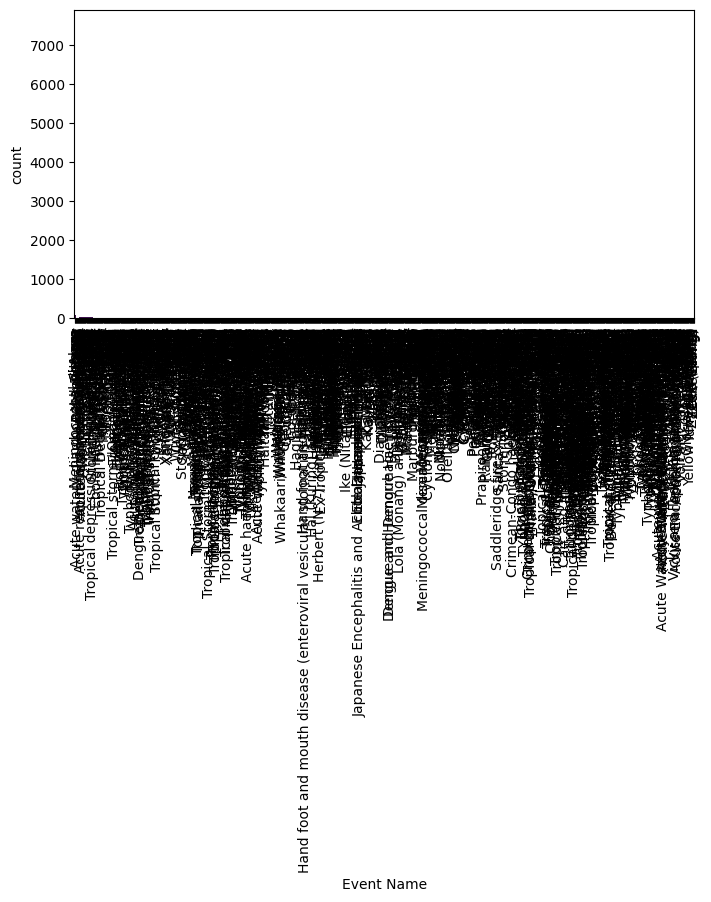

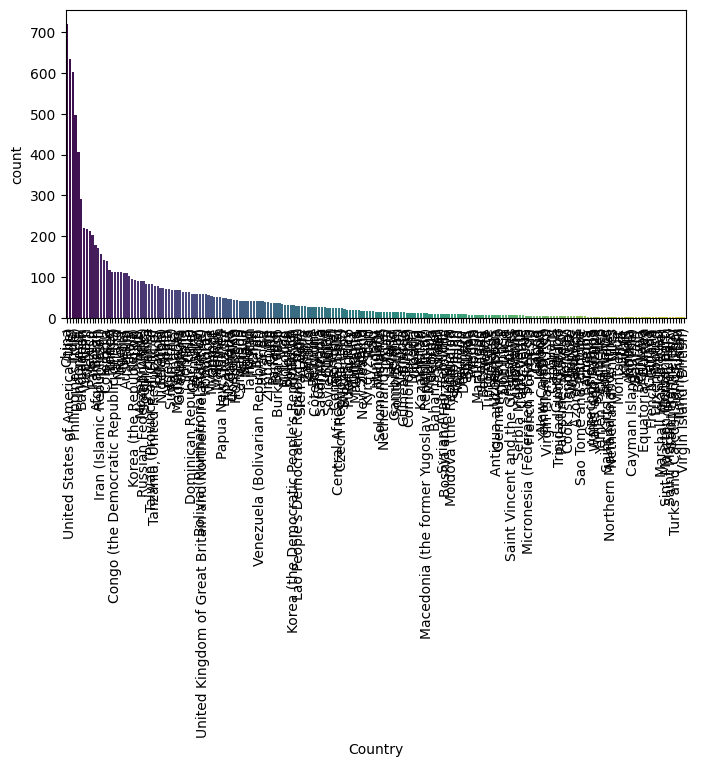

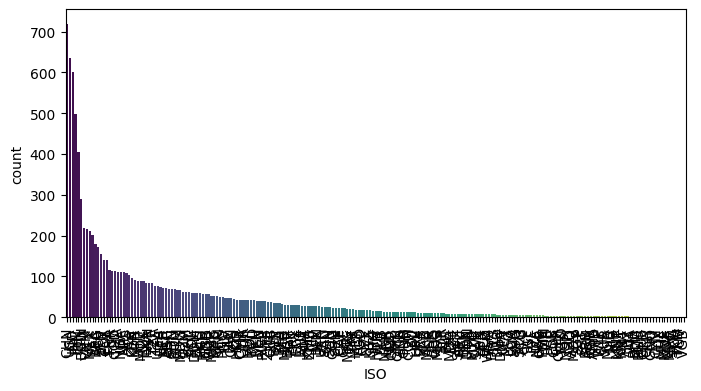

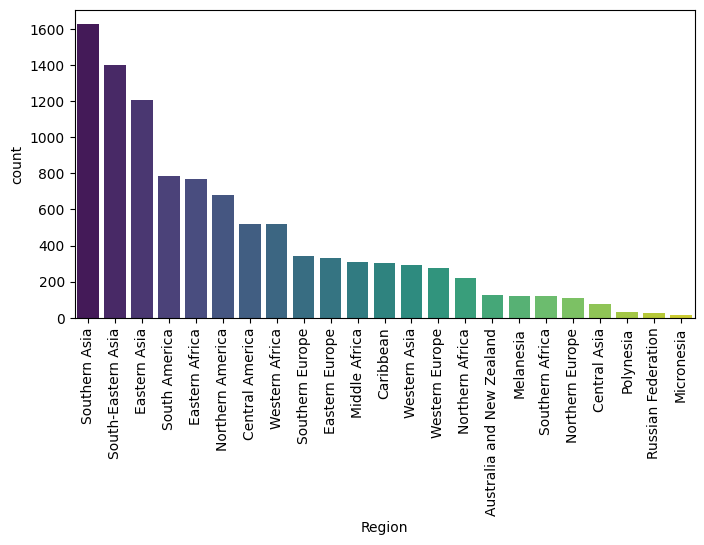

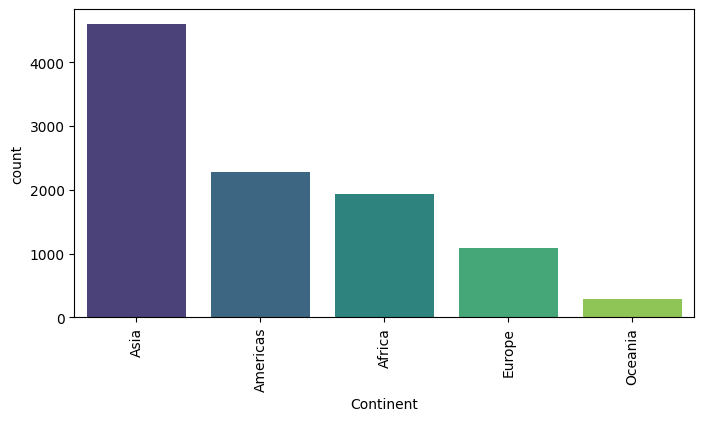

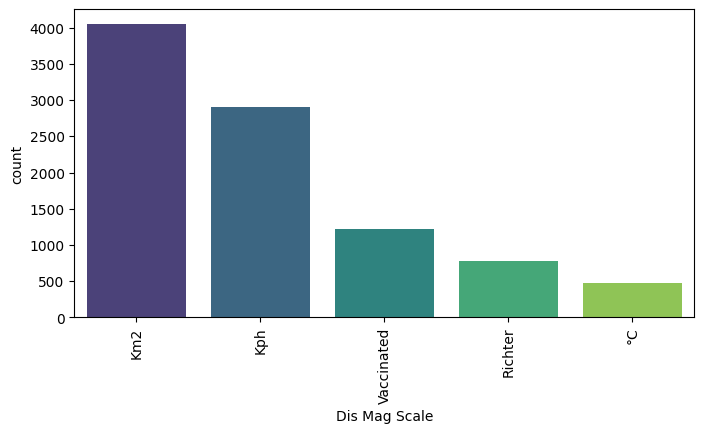

In [38]:
# Visualizamos las variables categóricas

def cat_plot(df, col_name):
    df_prueba5[col_name].dtype == "category"
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col_name, order=df[col_name].value_counts().index, palette="viridis")
    plt.xticks(rotation=90)
    plt.show()

cat_cols = cat_cols

for col in cat_cols:
    cat_plot(df_prueba5, col)

In [39]:
df_prueba5.rename(columns={"Total Damages ('000 US$)": "Total Damages ($k)"}, inplace=True)

In [40]:
num_cols = ['Year',
            'Dis Mag Value', 
            'Start Year', 
            'Start Month', 
            'Start Day', 
            'End Year', 
            'End Month', 
            'End Day',
            'Total Deaths',
            'Total Affected',
            'Total Damages ($k)',
            'CPI']

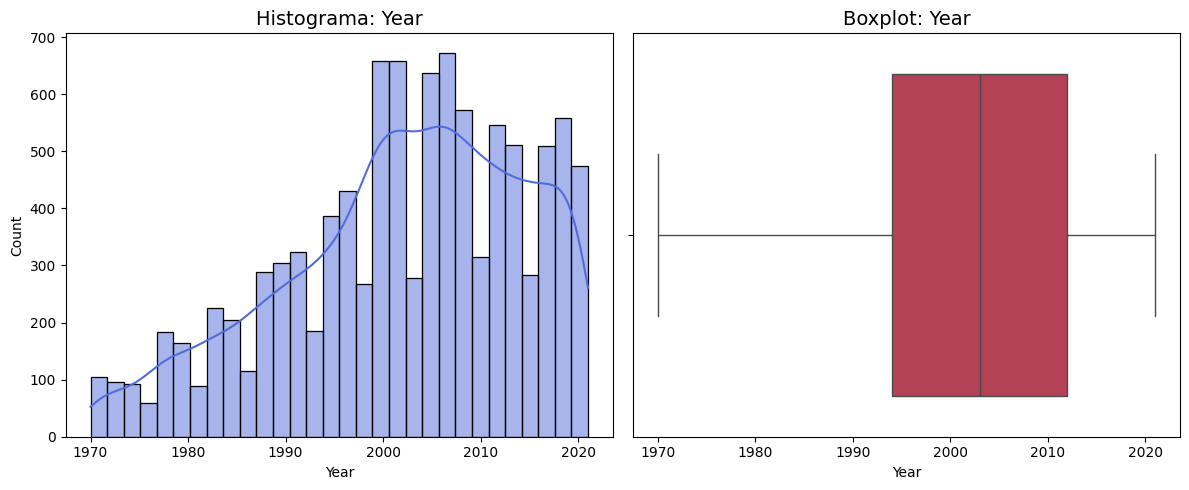

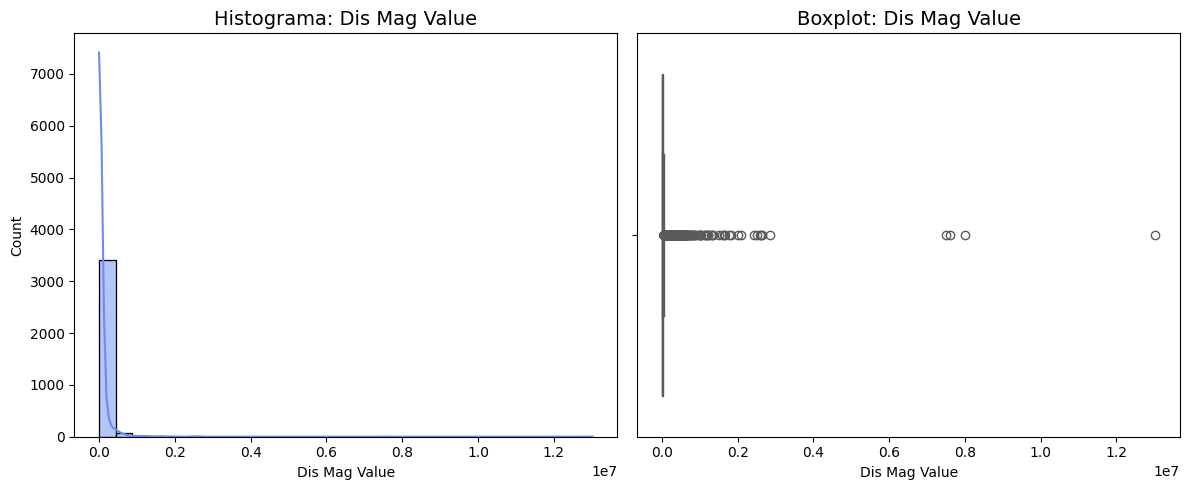

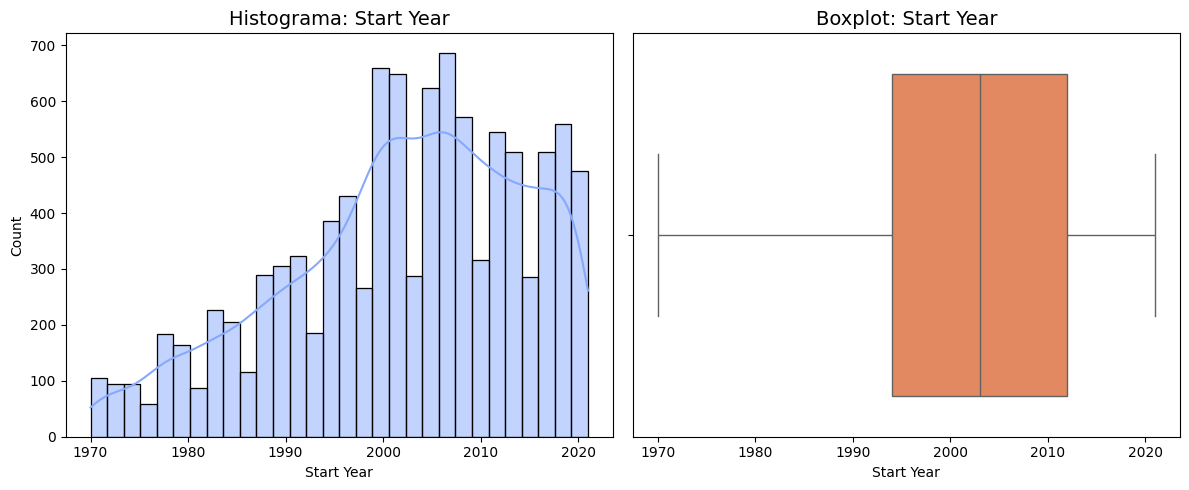

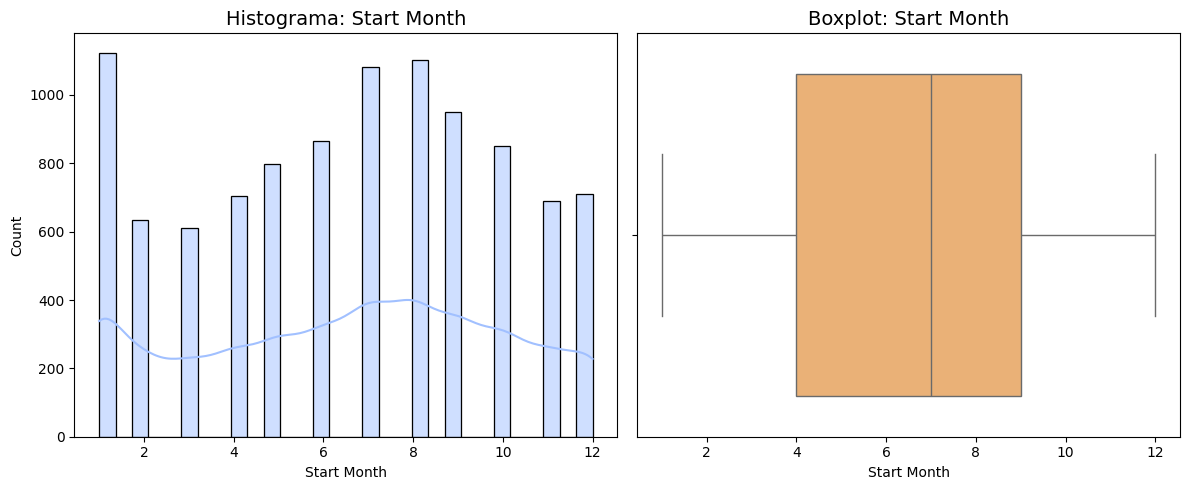

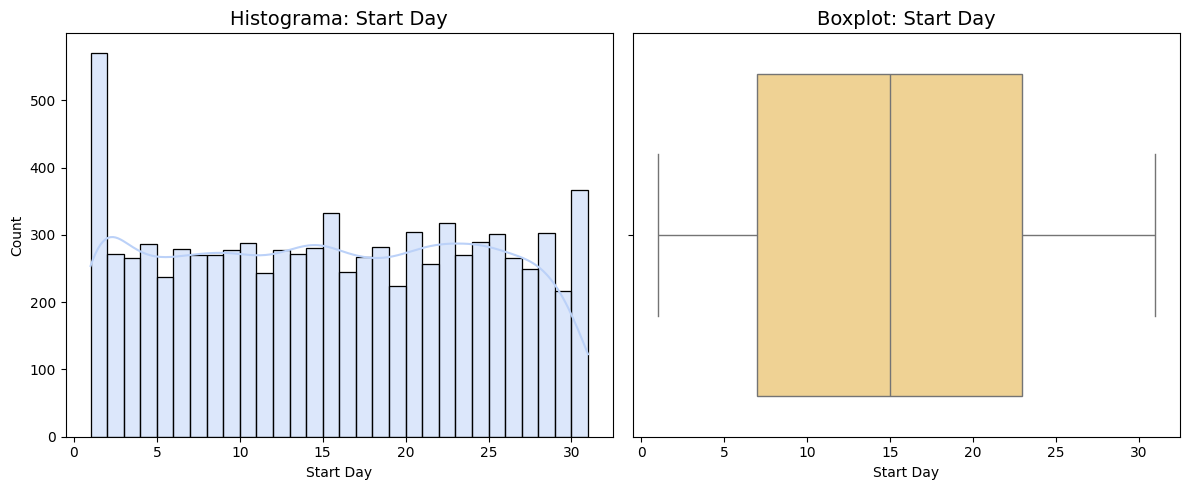

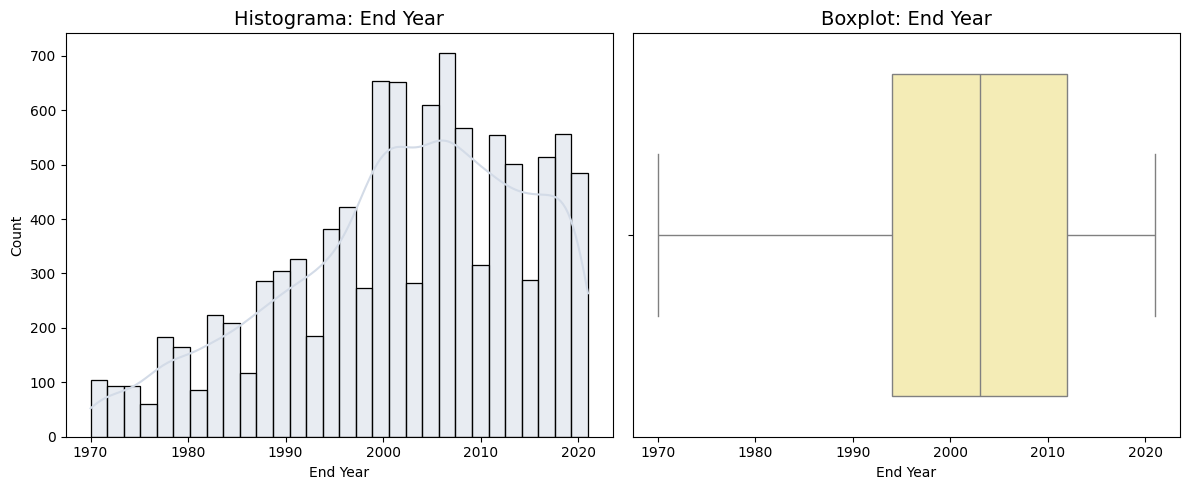

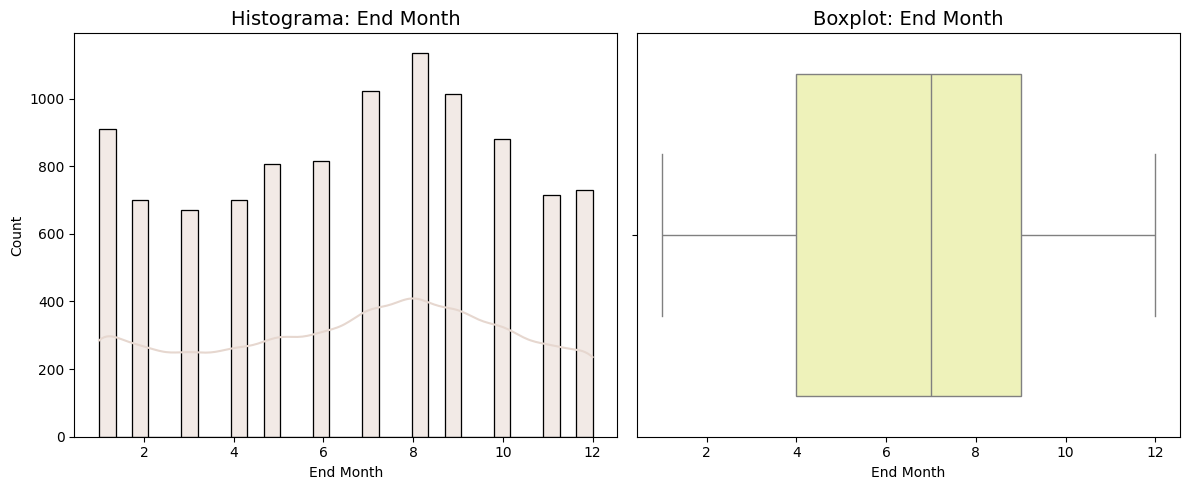

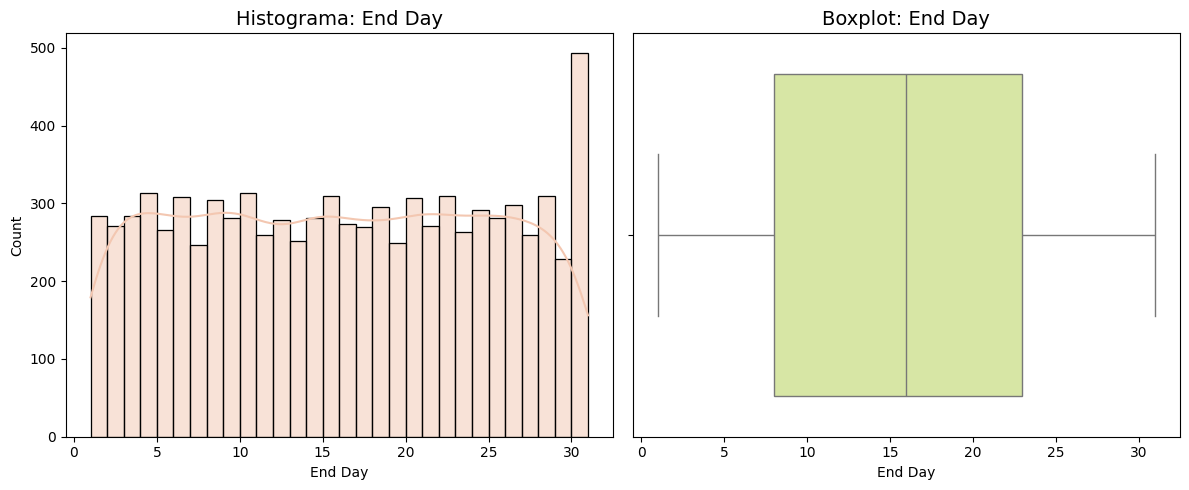

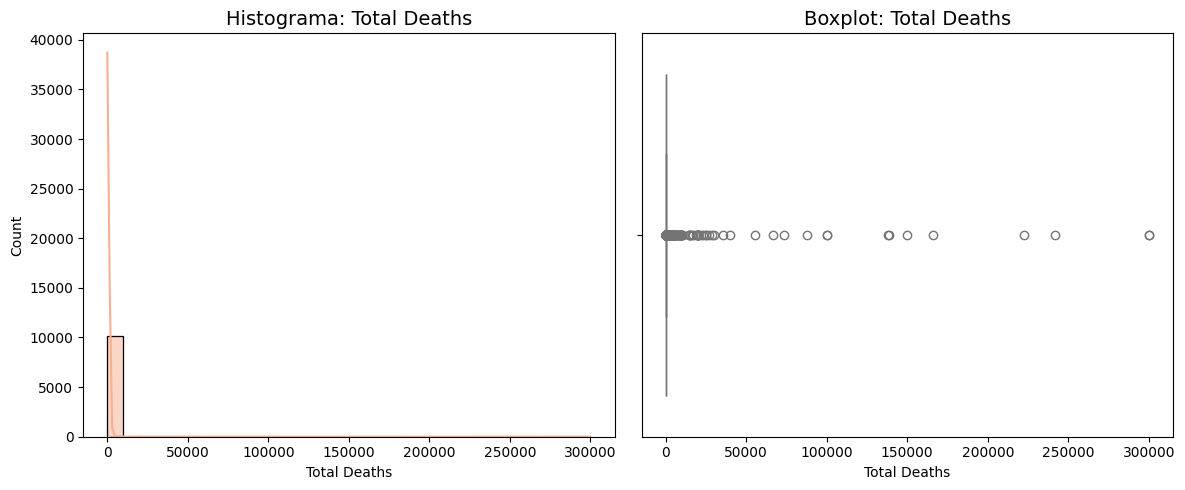

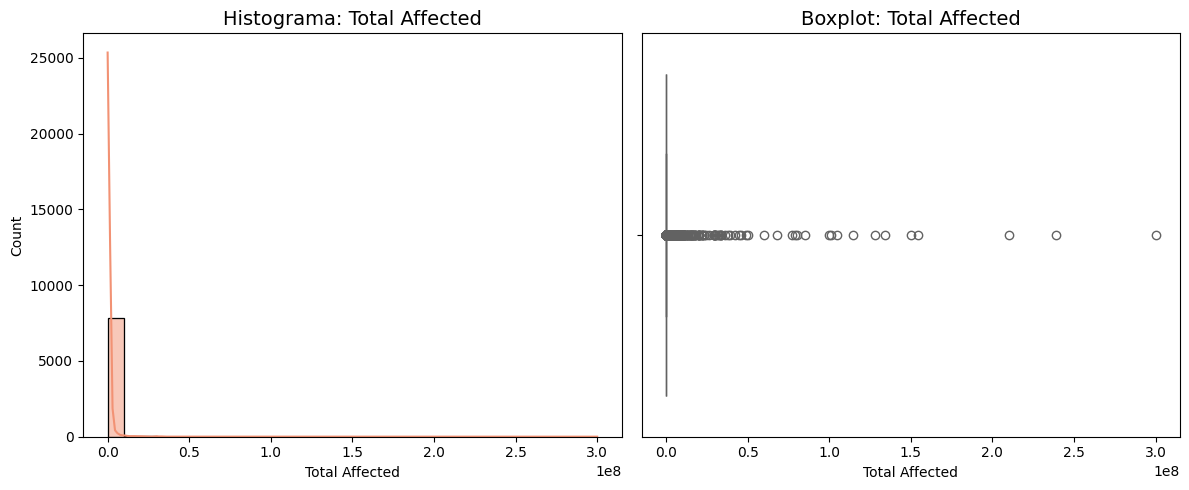

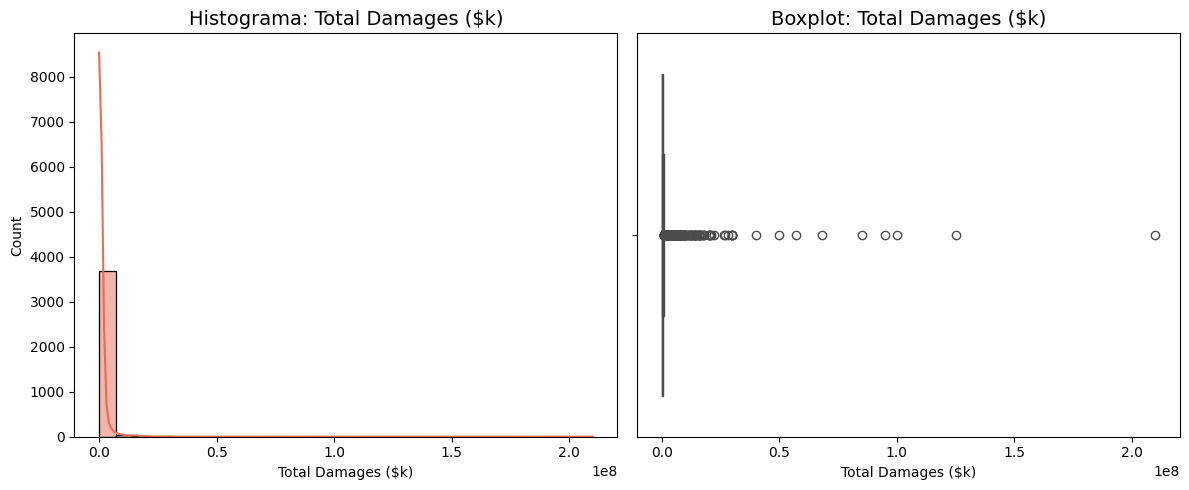

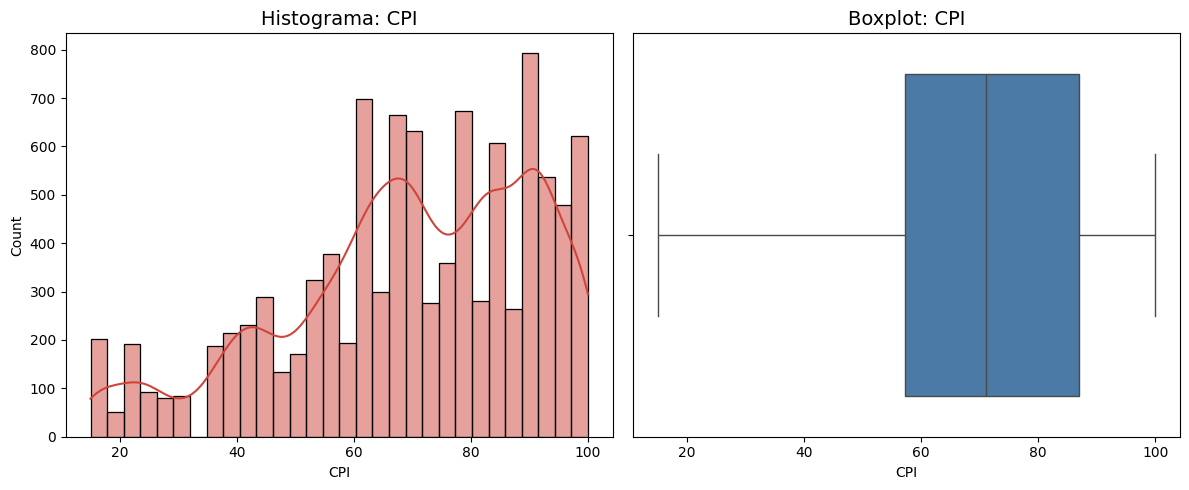

In [41]:
palette_hist = sns.color_palette("coolwarm", len(num_cols))
palette_box = sns.color_palette("Spectral", len(num_cols))

def num_plot2(df, num_cols):
    for idx, col in enumerate(num_cols):
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Histograma con estimaciones de densidad
        sns.histplot(df_prueba5[col], bins=30, kde=True, ax=axes[0], color=palette_hist[idx])
        axes[0].set_title(f"Histograma: {col}", fontsize=14)
        axes[0].set_xlabel(col)

        # Boxplot
        sns.boxplot(x=df_prueba5[col], ax=axes[1], color=palette_box[idx])
        axes[1].set_title(f"Boxplot: {col}", fontsize=14)
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()

num_plot2(df_prueba5, num_cols)

In [42]:
# Quitamos puntos de miles para evitar problemas de formato.
df_prueba5['CPI'] = df_prueba5['CPI'].astype(str).str.replace('.', '', regex=False)

df_prueba5['CPI'] = df_prueba5['CPI'].replace('nan', np.nan)

df_prueba5['CPI'] = df_prueba5['CPI'].astype(float)

In [43]:
df_prueba5.describe()

,Year,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages ($k),CPI,start_date,end_date,dis_duration,dis_duration_days
count,10199.000000,3.501000e+03,10199.000000,10121.000000,8580.000000,10199.000000,10100.000000,8654.000000,10199.000000,7.942000e+03,3.768000e+03,1.000800e+04,8579,8649,8497,8497.000000
mean,2001.995588,5.881678e+04,2002.000196,6.499555,15.189044,2002.030395,6.618812,15.807603,361.813119,7.093836e+05,9.055108e+05,6.510449e+09,2003-09-26 12:12:40.368341248,2003-10-19 11:51:45.515088640,10 days 10:20:15.958573614,10.430740
min,1970.000000,-5.700000e+01,1970.000000,1.000000,1.000000,1970.000000,1.000000,1.000000,1.000000,1.000000e+00,2.000000e+00,1.000000e+03,1970-01-01 00:00:00,1970-01-01 00:00:00,0 days 00:00:00,0.000000
25%,1994.000000,8.000000e+00,1994.000000,4.000000,7.000000,1994.000000,4.000000,8.000000,5.000000,6.650000e+02,1.094125e+04,5.262202e+09,1996-06-19 00:00:00,1996-07-26 00:00:00,0 days 00:00:00,0.000000
50%,2003.000000,2.000000e+02,2003.000000,7.000000,15.000000,2003.000000,7.000000,16.000000,16.000000,6.603000e+03,8.799500e+04,6.950047e+09,2005-05-21 00:00:00,2005-06-12 00:00:00,1 days 00:00:00,1.000000
75%,2012.000000,2.042200e+04,2012.000000,9.000000,23.000000,2012.000000,9.000000,23.000000,50.000000,6.697100e+04,4.200000e+05,8.425273e+09,2013-05-01 12:00:00,2013-05-28 00:00:00,6 days 00:00:00,6.000000
max,2021.000000,1.302587e+07,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,300000.000000,3.000000e+08,2.100000e+08,9.878145e+09,2021-10-07 00:00:00,2021-10-07 00:00:00,955 days 00:00:00,955.000000
std,12.375320,3.617961e+05,12.375665,3.374958,8.979295,12.382591,3.340445,8.867807,6495.045853,7.063373e+06,5.532790e+06,2.618786e+09,NaN,NaN,39 days 10:37:44.032844541,39.442871


In [44]:
df_missings = df_prueba5[df_prueba5['CPI'].isnull()]

# Obtener los países únicos con CPI faltante
paises_con_missing = df_missings['Country'].dropna().unique()

# Mostrar la lista
print("Países con valores faltantes en CPI:")
print(paises_con_missing)

Países con valores faltantes en CPI:
['Czech Republic (the)', 'Spain', 'China', 'Austria', 'Bangladesh', ..., 'South Africa', 'Zimbabwe', 'Uzbekistan', 'Yemen', 'South Sudan']
Length: 79
Categories (219, object): ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', ..., 'Yemen P Dem Rep', 'Yugoslavia', 'Zambia', 'Zimbabwe']


In [45]:
# Ordenamos por país para tener una idea más específica de la situación.
# Dejo la celda comentada por evitar listas muy largas. La información extraída se usó para analizar esta variable

# missings_por_pais = df_prueba5[df_prueba5['CPI'].isnull()].groupby('Country').size().reset_index(name='Num_Missings')

# missings_ordenados = missings_por_pais.sort_values(by='Num_Missings', ascending=False)

# print(missings_ordenados)

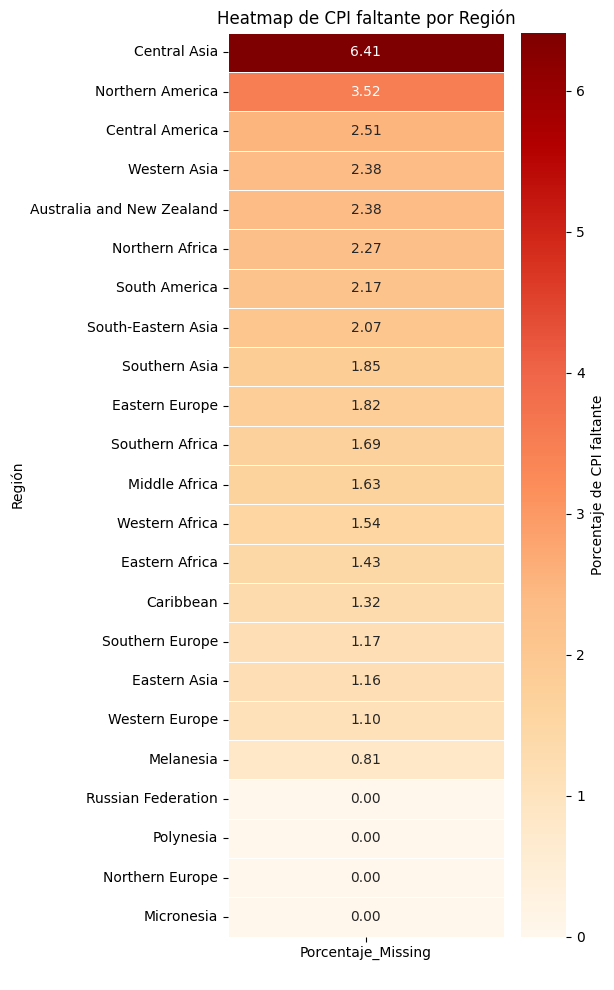

In [46]:
# Creamos un heatmap para visualizar el porcentaje de missings por región
total_por_region = df_prueba5.groupby('Region').size()

missings_por_region = df_prueba5[df_prueba5['CPI'].isna()].groupby('Region').size()

df_region_missings = (missings_por_region / total_por_region * 100).reset_index()

df_region_missings.columns = ['Region', 'Porcentaje_Missing']

df_region_missings = df_region_missings.sort_values(by='Porcentaje_Missing', ascending=False)

# Heatmap vertical de porcentaje de CPI faltante por región
plt.figure(figsize=(6, 10))
sns.heatmap(
    df_region_missings.set_index('Region'),
    annot=True, fmt=".2f", cmap="OrRd", linewidths=0.5, cbar_kws={'label': 'Porcentaje de CPI faltante'}
)
plt.title("Heatmap de CPI faltante por Región")
plt.xlabel(" ")
plt.ylabel("Región")
plt.tight_layout()
plt.show()

In [47]:
# Estadística descriptiva de CPI por país
# Comentada por evitar listas muy largas.

# cpi_stats = df_prueba5.groupby('Country')['CPI'].agg(['mean', 'std']).reset_index()

# # Mostrar resultados
# print("Estadísticas descriptivas de CPI por país:")
# print(cpi_stats)

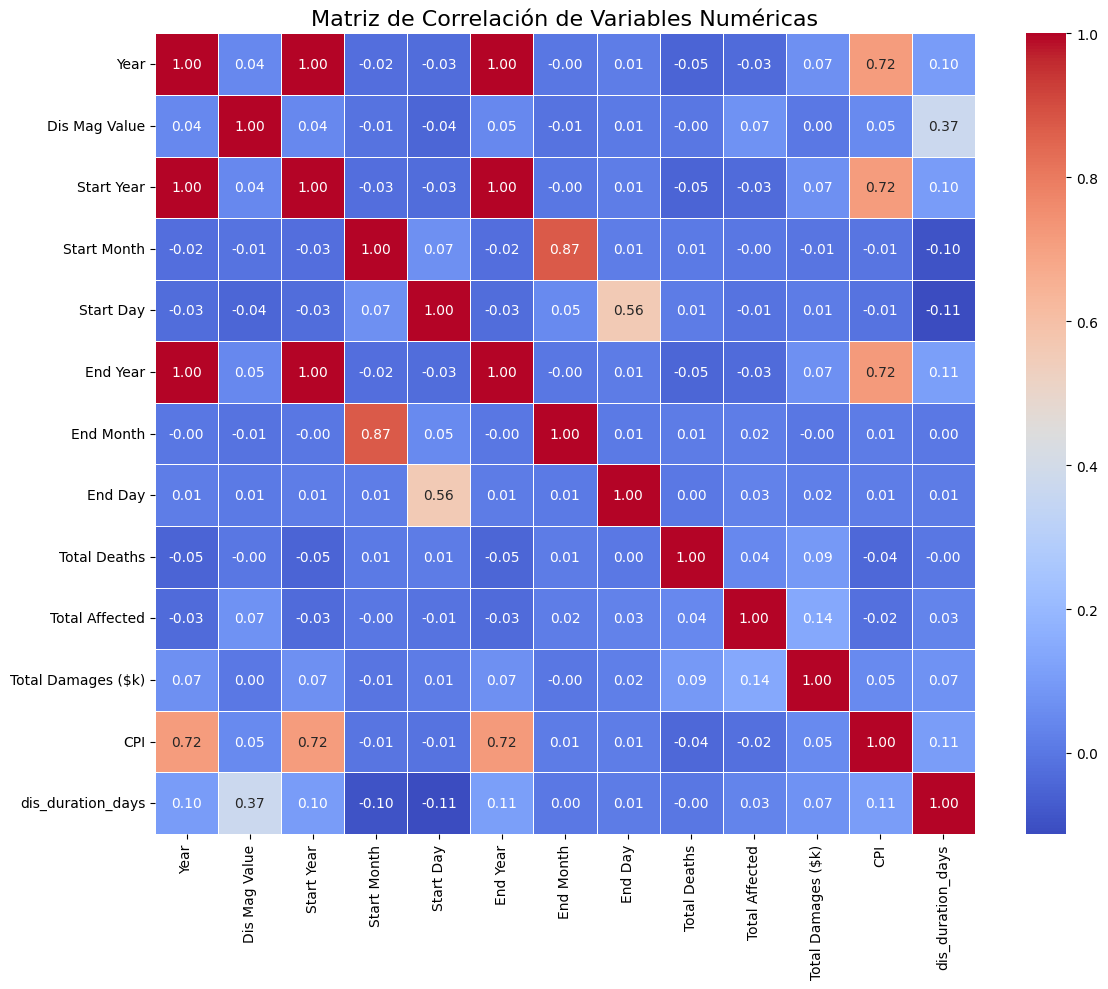

In [48]:
# Primero vamos a ver la correlación que pueda haber entre las variables numéricas y CPI
columnas_numericas = [
    'Year', 'Dis Mag Value', 'Start Year', 'Start Month', 'Start Day',
    'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
    'Total Damages ($k)', 'CPI', 'dis_duration_days'
]

# Filtrar el DataFrame
df_numericas = df_prueba5[columnas_numericas]

# Calcular la matriz de correlación
correlation_matrix = df_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

In [49]:
df_prueba5.columns = df_prueba5.columns.str.replace(' ', '_')

In [50]:
# Los siguientes pasos se pueden hacer con un bucle for pero me están dando errores por los missings.
modelo1 = ols('CPI ~ C(Region)', data=df_prueba5).fit()
tabla_anova1 = sm.stats.anova_lm(modelo1, typ=2)
print(tabla_anova1)

                 sum_sq      df         F        PR(>F)
C(Region)  1.077208e+21    22.0  7.237559  1.382936e-22
Residual   6.755117e+22  9985.0       NaN           NaN


In [51]:
modelo2 = ols('CPI ~ C(Country)', data=df_prueba5).fit()
tabla_anova2 = sm.stats.anova_lm(modelo2, typ=2)
print(tabla_anova2)

                  sum_sq      df         F        PR(>F)
C(Country)  4.195941e+21   218.0  2.924197  7.609260e-41
Residual    6.443244e+22  9789.0       NaN           NaN


In [52]:
modelo3 = ols('CPI ~ C(Continent)', data=df_prueba5).fit()
tabla_anova3 = sm.stats.anova_lm(modelo3, typ=2)
print(tabla_anova3)

                    sum_sq       df          F        PR(>F)
C(Continent)  6.283096e+20      4.0  23.106522  4.923089e-19
Residual      6.800007e+22  10003.0        NaN           NaN


In [53]:
modelo4 = ols('CPI ~ C(Disaster_Subgroup)', data=df_prueba5).fit()
tabla_anova4 = sm.stats.anova_lm(modelo4, typ=2)
print(tabla_anova4)

                            sum_sq       df          F        PR(>F)
C(Disaster_Subgroup)  6.027899e+20      4.0  22.159703  3.087755e-18
Residual              6.802559e+22  10003.0        NaN           NaN


In [54]:
columnas_KNN = [
    'Year', 'Dis_Mag_Value', 'Start_Month', 'Start_Day', 'End_Month', 'End_Day',
    'Total_Deaths', 'Total_Affected', 'Total_Damages_($k)', 'dis_duration_days', 'Region', 'CPI']
df_KNN = df_prueba5[columnas_KNN]

In [55]:
# Codificamos la variable categórica
df_encoded = pd.get_dummies(df_KNN, columns=['Region'], drop_first=True)

In [56]:
# Configuramos el KNN.
imputer = KNNImputer(n_neighbors=5)

# Escalamos los valores para evitar problemas por diferencias significativas de magnitudes.
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# KNN.
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)

In [57]:
# Desescalamos.
df_desescalado = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_imputed.columns)

In [58]:
# Imputamos.
df_desescalado.index = df_prueba5.index
df_prueba5['CPI'] = df_desescalado['CPI']

In [59]:
df_prueba5.isnull().mean() * 100

Year                   0.000000
Disaster_Group         0.000000
Disaster_Subgroup      0.000000
Disaster_Type          0.000000
Disaster_Subtype      17.384057
Event_Name             0.000000
Country                0.000000
ISO                    0.000000
Region                 0.000000
Continent              0.000000
Dis_Mag_Value         65.673105
Dis_Mag_Scale          7.608589
Start_Year             0.000000
Start_Month            0.764781
Start_Day             15.874105
End_Year               0.000000
End_Month              0.970683
End_Day               15.148544
Total_Deaths           0.000000
Total_Affected        22.129621
Total_Damages_($k)    63.055201
CPI                    0.000000
start_date            15.883910
end_date              15.197568
dis_duration          16.687911
dis_duration_days     16.687911
dtype: float64

In [60]:
df_limpio = df_prueba5.drop(['Dis_Mag_Value', 'Total_Damages_($k)', 'dis_duration', 'dis_duration_days'], axis=1)

In [61]:
df_limpio.isnull().mean() * 100

Year                  0.000000
Disaster_Group        0.000000
Disaster_Subgroup     0.000000
Disaster_Type         0.000000
Disaster_Subtype     17.384057
Event_Name            0.000000
Country               0.000000
ISO                   0.000000
Region                0.000000
Continent             0.000000
Dis_Mag_Scale         7.608589
Start_Year            0.000000
Start_Month           0.764781
Start_Day            15.874105
End_Year              0.000000
End_Month             0.970683
End_Day              15.148544
Total_Deaths          0.000000
Total_Affected       22.129621
CPI                   0.000000
start_date           15.883910
end_date             15.197568
dtype: float64

In [62]:
df_limpio.drop(['start_date', 'end_date'], axis=1, inplace=True)

In [63]:
df_limpio.describe()

,Year,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,Total_Deaths,Total_Affected,CPI
count,10199.000000,10199.000000,10121.000000,8580.000000,10199.000000,10100.000000,8654.000000,10199.000000,7.942000e+03,1.019900e+04
mean,2001.995588,2002.000196,6.499555,15.189044,2002.030395,6.618812,15.807603,361.813119,7.093836e+05,6.533593e+09
std,12.375320,12.375665,3.374958,8.979295,12.382591,3.340445,8.867807,6495.045853,7.063373e+06,2.608836e+09
min,1970.000000,1970.000000,1.000000,1.000000,1970.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+03
25%,1994.000000,1994.000000,4.000000,7.000000,1994.000000,4.000000,8.000000,5.000000,6.650000e+02,5.262202e+09
50%,2003.000000,2003.000000,7.000000,15.000000,2003.000000,7.000000,16.000000,16.000000,6.603000e+03,6.950047e+09
75%,2012.000000,2012.000000,9.000000,23.000000,2012.000000,9.000000,23.000000,50.000000,6.697100e+04,8.425273e+09
max,2021.000000,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,300000.000000,3.000000e+08,9.878145e+09


In [64]:
df_limpio['Start_Month'].fillna(df_limpio['Start_Month'].median(), inplace=True)
df_limpio['End_Month'].fillna(df_limpio['End_Month'].median(), inplace=True)

In [65]:
df_limpio['Start_Day'] = df_limpio.groupby(['Disaster_Type', 'Region'])['Start_Day'].transform(
    lambda x: x.fillna(x.median())
)

df_limpio['End_Day'] = df_limpio.groupby(['Disaster_Type', 'Region'])['End_Day'].transform(
    lambda x: x.fillna(x.median())
)

In [66]:
df_limpio.isnull().mean() * 100

Year                  0.000000
Disaster_Group        0.000000
Disaster_Subgroup     0.000000
Disaster_Type         0.000000
Disaster_Subtype     17.384057
Event_Name            0.000000
Country               0.000000
ISO                   0.000000
Region                0.000000
Continent             0.000000
Dis_Mag_Scale         7.608589
Start_Year            0.000000
Start_Month           0.000000
Start_Day             0.539269
End_Year              0.000000
End_Month             0.000000
End_Day               0.509854
Total_Deaths          0.000000
Total_Affected       22.129621
CPI                   0.000000
dtype: float64

In [67]:
df_limpio['Start_Day'].fillna(df_limpio['Start_Day'].median(), inplace=True)
df_limpio['End_Day'].fillna(df_limpio['End_Day'].median(), inplace=True)

In [68]:
df_limpio.isnull().mean() * 100

Year                  0.000000
Disaster_Group        0.000000
Disaster_Subgroup     0.000000
Disaster_Type         0.000000
Disaster_Subtype     17.384057
Event_Name            0.000000
Country               0.000000
ISO                   0.000000
Region                0.000000
Continent             0.000000
Dis_Mag_Scale         7.608589
Start_Year            0.000000
Start_Month           0.000000
Start_Day             0.000000
End_Year              0.000000
End_Month             0.000000
End_Day               0.000000
Total_Deaths          0.000000
Total_Affected       22.129621
CPI                   0.000000
dtype: float64

In [69]:
# Observamos que hay grupos sin registros.
count_scale_disaster = df_limpio.groupby('Disaster_Type')['Dis_Mag_Scale'].count()
count_scale_disaster

Disaster_Type
Animal accident             0
Drought                    53
Earthquake                781
Epidemic                 1217
Extreme temperature       472
Flood                    3810
Glacial lake outburst       0
Landslide                   0
Mass movement (dry)         0
Storm                    2902
Volcanic activity           0
Wildfire                  188
Name: Dis_Mag_Scale, dtype: int64

In [70]:
def imputar_moda(grupo):
    moda = grupo.mode().dropna()
    if not moda.empty:
        return grupo.fillna(moda.iloc[0])
    return grupo

df_limpio['Dis_Mag_Scale'] = df_limpio.groupby('Disaster_Type')['Dis_Mag_Scale'].transform(imputar_moda)

In [71]:
df_limpio.isnull().mean() * 100

Year                  0.000000
Disaster_Group        0.000000
Disaster_Subgroup     0.000000
Disaster_Type         0.000000
Disaster_Subtype     17.384057
Event_Name            0.000000
Country               0.000000
ISO                   0.000000
Region                0.000000
Continent             0.000000
Dis_Mag_Scale         7.608589
Start_Year            0.000000
Start_Month           0.000000
Start_Day             0.000000
End_Year              0.000000
End_Month             0.000000
End_Day               0.000000
Total_Deaths          0.000000
Total_Affected       22.129621
CPI                   0.000000
dtype: float64

In [72]:
df_limpio['Dis_Mag_Scale'] = df_limpio['Dis_Mag_Scale'].cat.add_categories(['unknown'])
df_limpio['Dis_Mag_Scale'] = df_limpio['Dis_Mag_Scale'].fillna('unknown')

In [73]:
df_limpio['Disaster_Subtype'] = df_limpio.groupby('Disaster_Subgroup')['Disaster_Subtype'].transform(imputar_moda)

In [74]:
df_limpio.isnull().mean() * 100

Year                  0.000000
Disaster_Group        0.000000
Disaster_Subgroup     0.000000
Disaster_Type         0.000000
Disaster_Subtype      0.000000
Event_Name            0.000000
Country               0.000000
ISO                   0.000000
Region                0.000000
Continent             0.000000
Dis_Mag_Scale         0.000000
Start_Year            0.000000
Start_Month           0.000000
Start_Day             0.000000
End_Year              0.000000
End_Month             0.000000
End_Day               0.000000
Total_Deaths          0.000000
Total_Affected       22.129621
CPI                   0.000000
dtype: float64

In [75]:
# Creo columna con la duración en días de los eventos
# Crear fechas de inicio
start_dates = pd.to_datetime(
    df_limpio[['Start_Year', 'Start_Month', 'Start_Day']].rename(
        columns={'Start_Year': 'year', 'Start_Month': 'month', 'Start_Day': 'day'}
    ),
    errors='coerce')

# Crear fechas de fin
end_dates = pd.to_datetime(
    df_limpio[['End_Year', 'End_Month', 'End_Day']].rename(
        columns={'End_Year': 'year', 'End_Month': 'month', 'End_Day': 'day'}
    ),
    errors='coerce')

# Calcular duración
df_limpio['Duration_Days'] = (end_dates - start_dates).dt.days

In [76]:
df_limpio['Duration_Days'].isna().sum()

np.int64(5)

In [77]:
df_limpio['Duration_Days'].describe()

count    10194.000000
mean        15.552580
std         63.153204
min       -152.000000
25%          0.000000
50%          1.000000
75%          6.000000
max       1674.000000
Name: Duration_Days, dtype: float64

In [78]:
df_limpio[df_limpio['Duration_Days'] == -152]

,Year,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,ISO,Region,Continent,Dis_Mag_Scale,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,Total_Deaths,Total_Affected,CPI,Duration_Days
3461,1989,Natural,Climatological,Drought,Drought,nan,Rwanda,RWA,Eastern Africa,Africa,Km2,1989,12.0,15.0,1989,7.0,16.0,237.0,60000.0,4.789850e+09,-152.0


In [79]:
duracion_subtipo = df_limpio.groupby('Disaster_Subtype')['Duration_Days'].mean()
duracion_subtipo

Disaster_Subtype
Ash fall                              3.826923
Avalanche                             1.638889
Bacterial disease                    57.213740
Coastal flood                         9.314815
Cold wave                            14.605691
Convective storm                      2.841755
Drought                             349.923077
Extra-tropical storm                  1.488095
Flash flood                           6.206400
Forest fire                          23.441379
Ground movement                       0.017403
Heat wave                            15.603352
Land fire (Brush, Bush, Pasture)     18.043478
Landslide                             0.951904
Lava flow                             1.000000
Mudslide                              1.971831
Parasitic disease                    11.941176
Pyroclastic flow                      0.000000
Riverine flood                       10.861129
Rockfall                              0.000000
Severe winter conditions             17.106

In [80]:
duracion_subtipo2 = df_limpio.groupby('Disaster_Subtype')['Duration_Days'].median()
duracion_subtipo2

Disaster_Subtype
Ash fall                              0.0
Avalanche                             0.0
Bacterial disease                    10.0
Coastal flood                         2.0
Cold wave                             4.0
Convective storm                      1.0
Drought                             141.5
Extra-tropical storm                  1.0
Flash flood                           2.0
Forest fire                           4.0
Ground movement                       0.0
Heat wave                             5.0
Land fire (Brush, Bush, Pasture)      3.0
Landslide                             0.0
Lava flow                             1.0
Mudslide                              0.0
Parasitic disease                     3.0
Pyroclastic flow                      0.0
Riverine flood                        3.0
Rockfall                              0.0
Severe winter conditions              6.0
Subsidence                            0.0
Tropical cyclone                      0.0
Tsunami          

In [81]:
df_limpio[df_limpio['Duration_Days'] == 1674]

,Year,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,ISO,Region,Continent,Dis_Mag_Scale,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,Total_Deaths,Total_Affected,CPI,Duration_Days
89,1973,Natural,Climatological,Drought,Drought,nan,Ethiopia,ETH,Eastern Africa,Africa,Km2,1973,12.0,15.0,1978,7.0,16.0,100000.0,3000000.0,1.715536e+09,1674.0


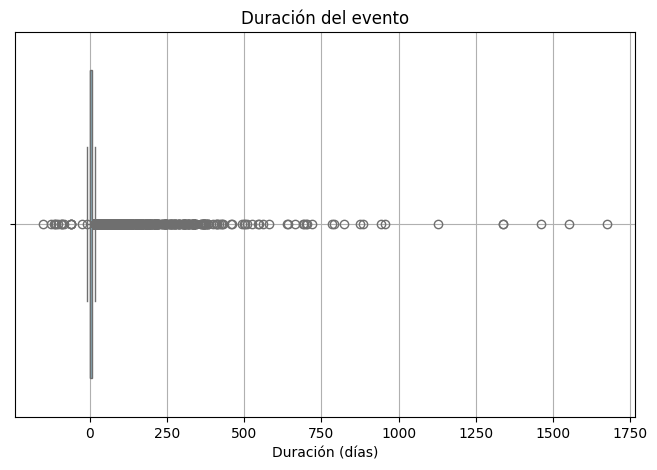

In [82]:
# Verificamos outliers, aunque ya vemos valores fuera de rango

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpio['Duration_Days'], color='skyblue')
plt.title('Duración del evento')
plt.xlabel('Duración (días)')
plt.grid(True)
plt.show()

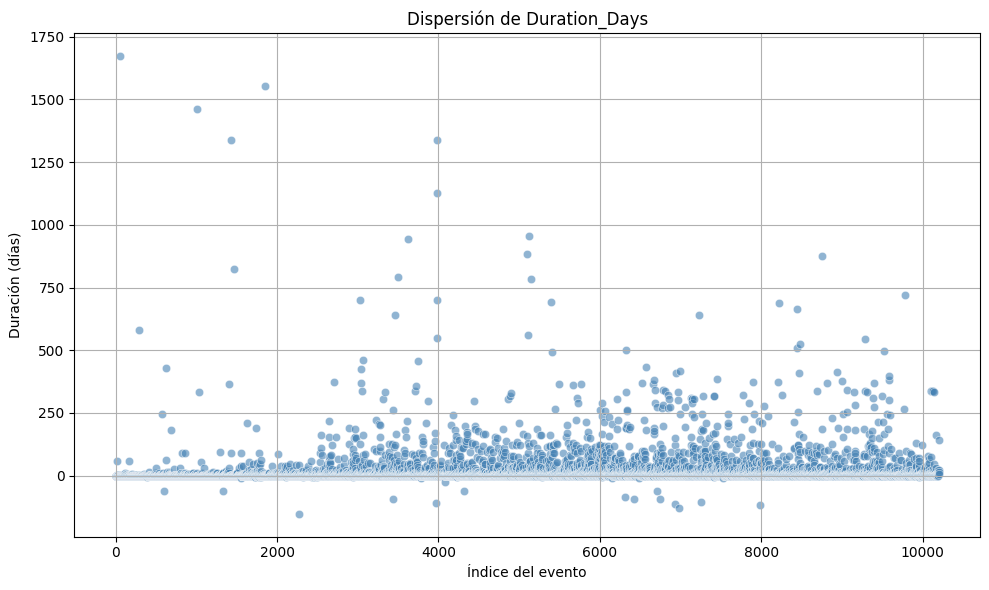

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(df_limpio)), y=df_limpio['Duration_Days'], color='steelblue', alpha=0.6)
plt.title('Dispersión de Duration_Days')
plt.xlabel('Índice del evento')
plt.ylabel('Duración (días)')
plt.grid(True)
plt.tight_layout()
plt.show()

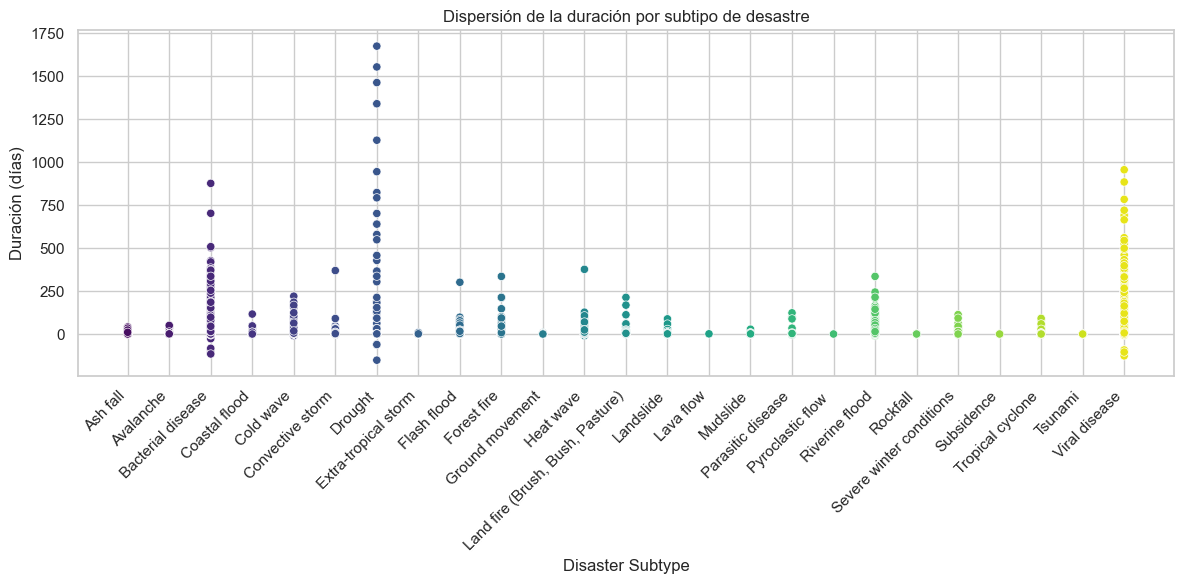

In [84]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df_limpio, x='Disaster_Subtype', y='Duration_Days', hue='Disaster_Subtype', palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Dispersión de la duración por subtipo de desastre')
plt.xlabel('Disaster Subtype')
plt.ylabel('Duración (días)')
plt.legend().remove()
plt.tight_layout()
plt.show()

In [85]:
df_limpio[df_limpio['Duration_Days'] < 0].count()

Year                 114
Disaster_Group       114
Disaster_Subgroup    114
Disaster_Type        114
Disaster_Subtype     114
Event_Name           114
Country              114
ISO                  114
Region               114
Continent            114
Dis_Mag_Scale        114
Start_Year           114
Start_Month          114
Start_Day            114
End_Year             114
End_Month            114
End_Day              114
Total_Deaths         114
Total_Affected        67
CPI                  114
Duration_Days        114
dtype: int64

In [86]:
df_limpio = df_limpio[df_limpio['Duration_Days'] >= 0]

In [87]:
df_limpio.isnull().mean() * 100

Year                  0.000000
Disaster_Group        0.000000
Disaster_Subgroup     0.000000
Disaster_Type         0.000000
Disaster_Subtype      0.000000
Event_Name            0.000000
Country               0.000000
ISO                   0.000000
Region                0.000000
Continent             0.000000
Dis_Mag_Scale         0.000000
Start_Year            0.000000
Start_Month           0.000000
Start_Day             0.000000
End_Year              0.000000
End_Month             0.000000
End_Day               0.000000
Total_Deaths          0.000000
Total_Affected       21.914683
CPI                   0.000000
Duration_Days         0.000000
dtype: float64

In [88]:
df_prep = df_limpio.drop(columns=['Total_Affected'])

In [89]:
# Ya tenemos una columna con la duración en días de los eventos.
# Mantener las variables de start y end day no tiene sentido. Muchos valores únicos que no aportan valor.

df_prep = df_prep.drop(columns=['Start_Day', 'End_Day'])

In [90]:
# Para el caso de los meses, la cuestión es similar. 
# Voy a crear una variable de estacionalidad tomando el mes de inicio del evento.

def season_tram(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

In [91]:
df_prep['Season'] = df_prep['Start_Month'].map(season_tram)

In [92]:
df_prep = df_prep.drop(columns=['Start_Month', 'End_Month'])

In [93]:
df_prep['Year'].nunique()

52

In [94]:
df_prep = df_prep.drop(columns=['Start_Year', 'End_Year'])

In [95]:
# Eliminamos Disaster_Group porque solo tiene un valor único y no aporta información relevante.
df_prep = df_prep.drop(columns=['Disaster_Group'])

In [96]:
df_prep2 = df_prep.drop(columns=['CPI'])

## Visualización de los datos

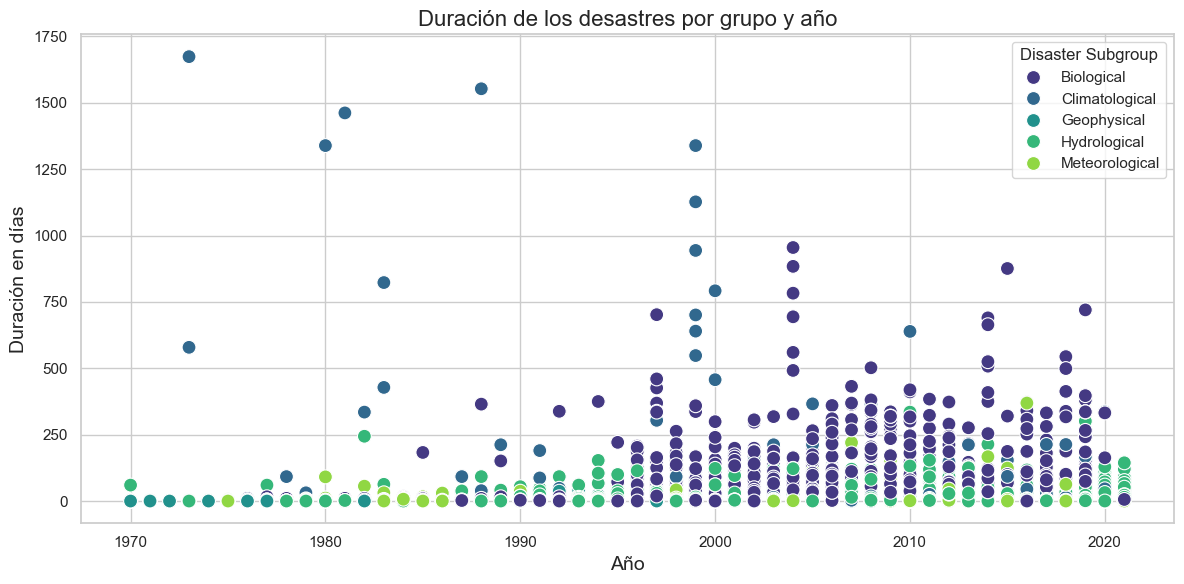

In [97]:
# Duración de los desastres por subgrupo y año
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_prep, x='Year', y='Duration_Days', hue='Disaster_Subgroup', palette='viridis', s=100)
plt.title('Duración de los desastres por grupo y año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Duración en días', fontsize=14)
plt.legend(title='Disaster Subgroup')
plt.tight_layout()
plt.show()

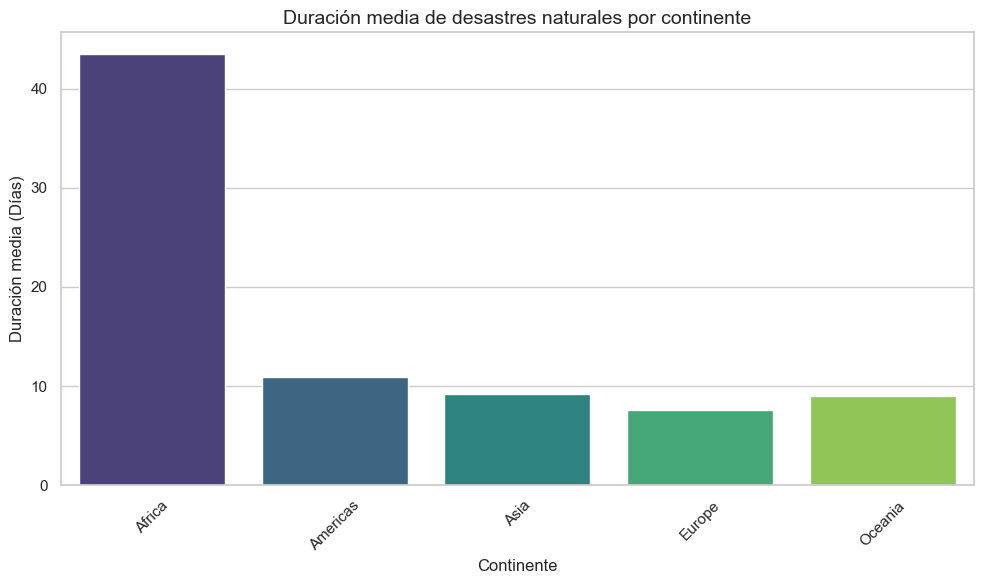

In [98]:
sns.set(style="whitegrid")

# Duración media de desastres naturales por continente
avg_duration = df_prep.groupby('Continent')['Duration_Days'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration, x='Continent', y='Duration_Days', palette='viridis')
plt.title('Duración media de desastres naturales por continente', fontsize=14)
plt.xlabel('Continente', fontsize=12)
plt.ylabel('Duración media (Días)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

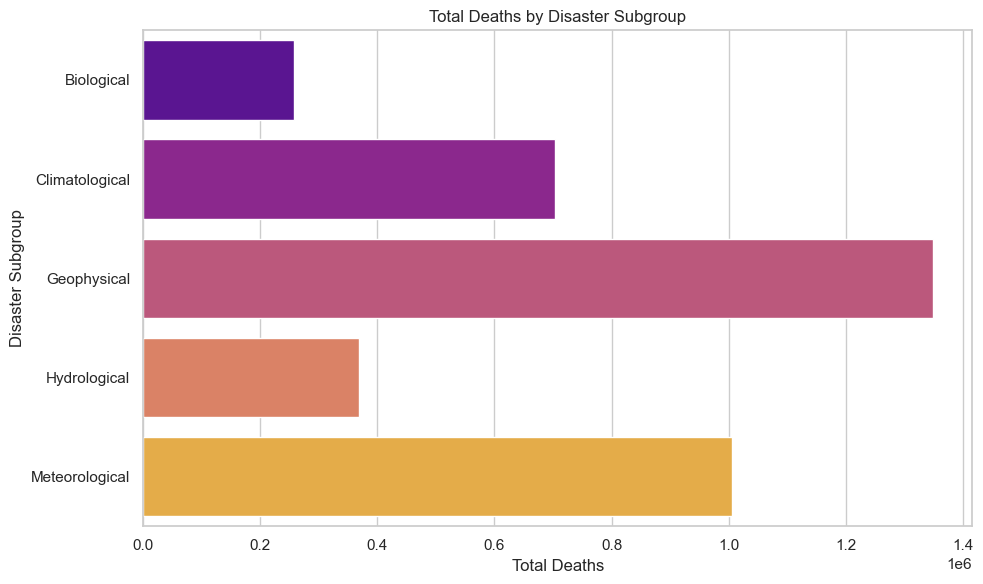

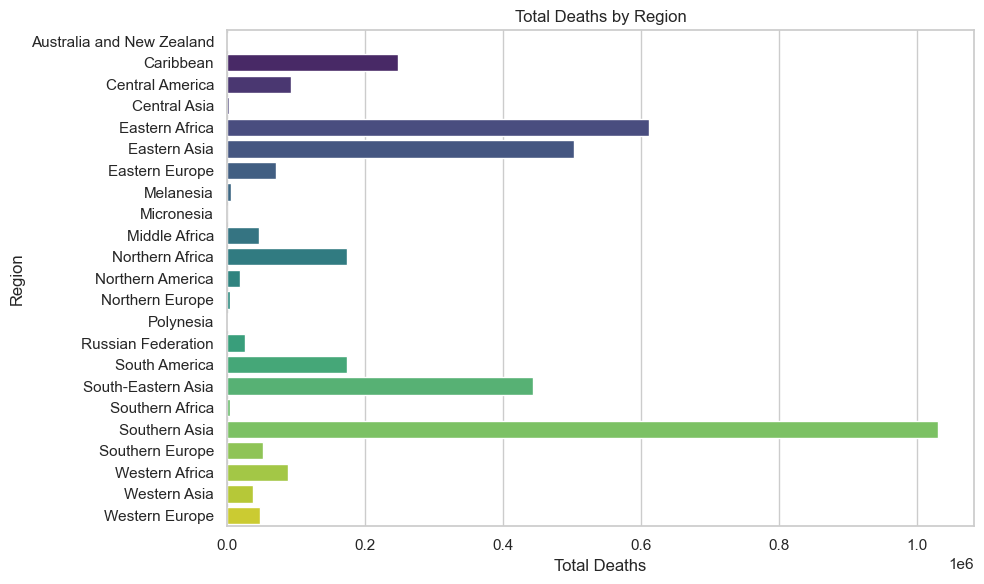

In [99]:
sns.set(style="whitegrid")

# Total_Deaths por Disaster_Subgroup
disaster_deaths = df_prep.groupby('Disaster_Subgroup')['Total_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=disaster_deaths.values, y=disaster_deaths.index, palette='plasma')
plt.title('Total Deaths by Disaster Subgroup')
plt.xlabel('Total Deaths')
plt.ylabel('Disaster Subgroup')
plt.tight_layout()
plt.show()

# Total Deaths por Region
region_deaths = df_prep.groupby('Region')['Total_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_deaths.values, y=region_deaths.index, palette='viridis')
plt.title('Total Deaths by Region')
plt.xlabel('Total Deaths')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

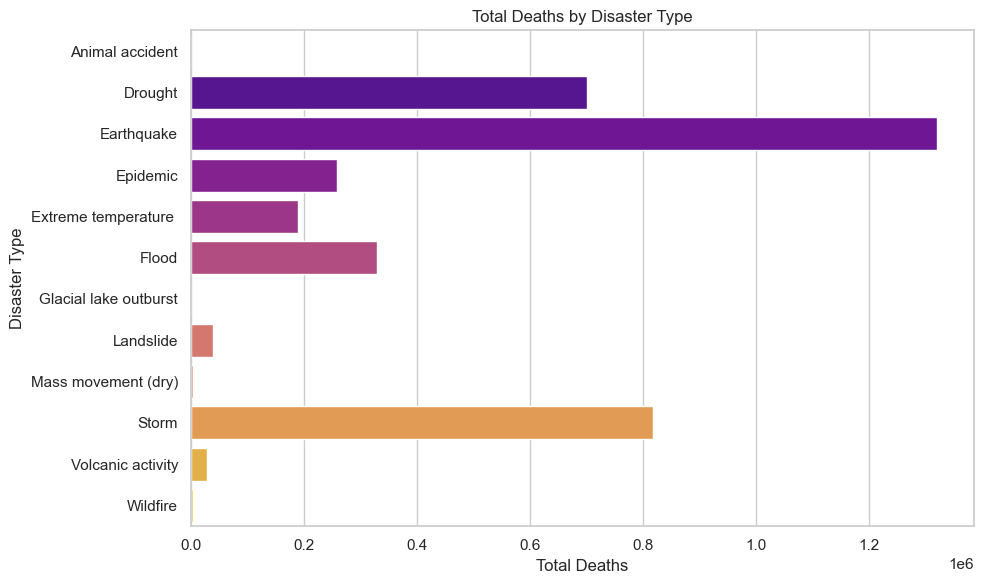

In [100]:
sns.set(style="whitegrid")

# Total_Deaths por Disaster_Type
disaster_deaths = df_prep.groupby('Disaster_Type')['Total_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=disaster_deaths.values, y=disaster_deaths.index, palette='plasma')
plt.title('Total Deaths by Disaster Type')
plt.xlabel('Total Deaths')
plt.ylabel('Disaster Type')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

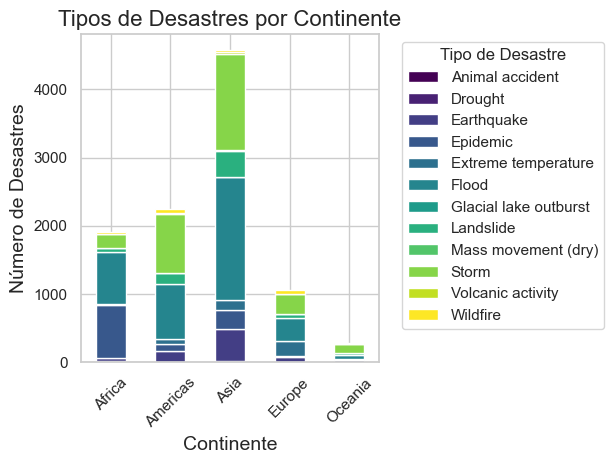

In [101]:
sns.set(style="whitegrid")

# Tipo de desastres por continente
disaster_counts = df_prep.groupby(['Continent', 'Disaster_Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
disaster_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Tipos de Desastres por Continente', fontsize=16)
plt.xlabel('Continente', fontsize=14)
plt.ylabel('Número de Desastres', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

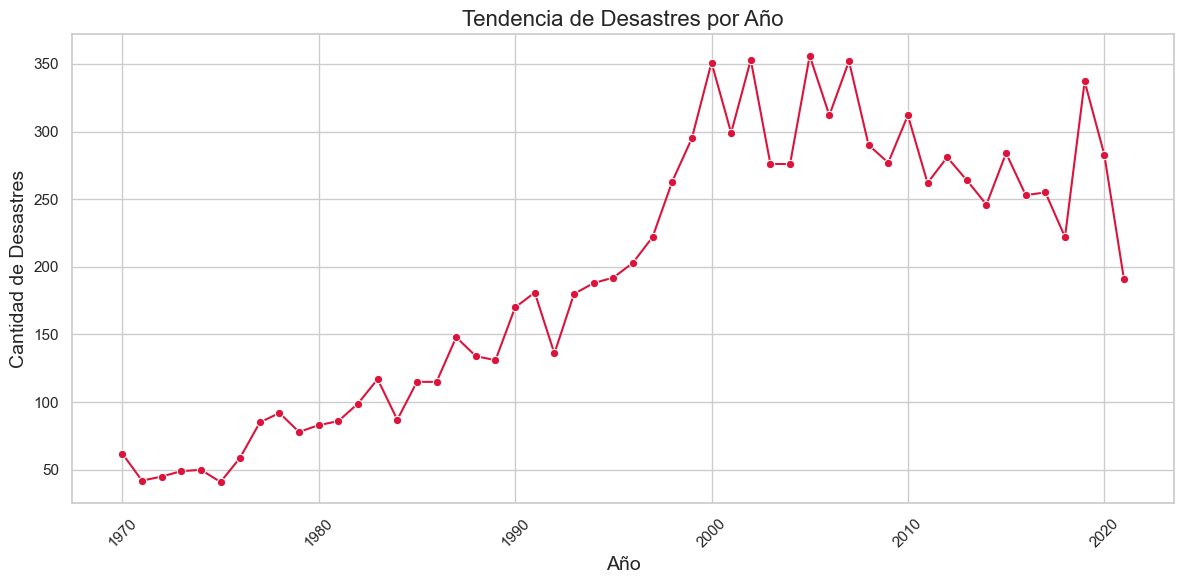

In [102]:
sns.set(style="whitegrid")

disasters_per_year = df_prep['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=disasters_per_year.index, y=disasters_per_year.values, marker='o', color='crimson')
plt.title('Tendencia de Desastres por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Desastres', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

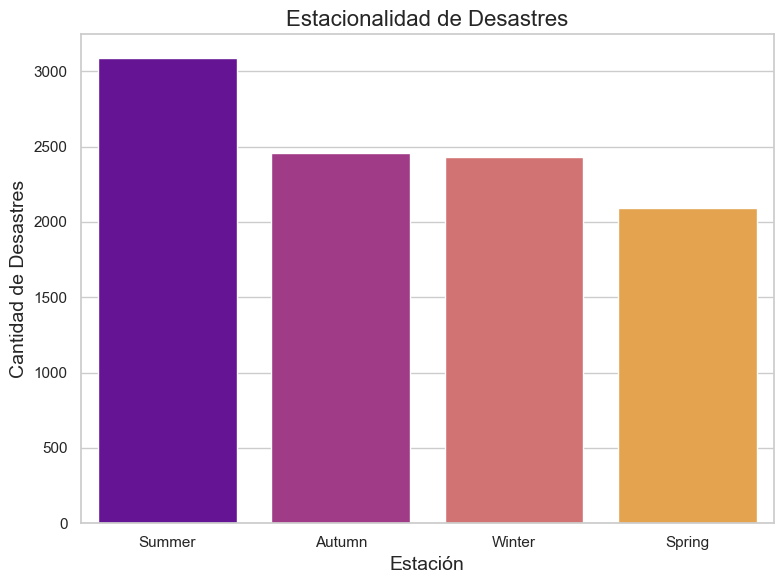

In [103]:
sns.set(style="whitegrid")

disasters_per_season = df_prep['Season'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=disasters_per_season.index, y=disasters_per_season.values, palette='plasma')
plt.title('Estacionalidad de Desastres', fontsize=16)
plt.xlabel('Estación', fontsize=14)
plt.ylabel('Cantidad de Desastres', fontsize=14)
plt.tight_layout()
plt.show()

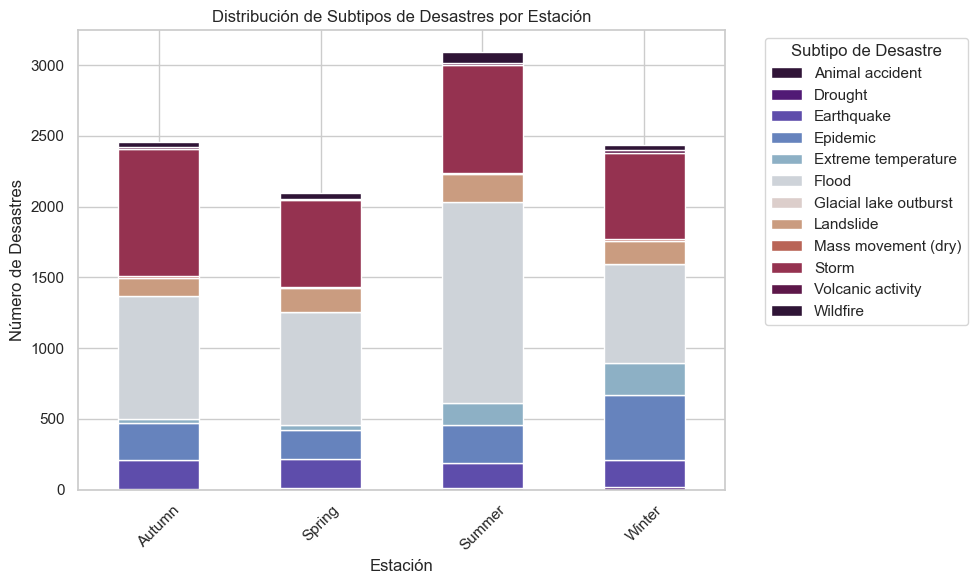

In [104]:
sns.set(style="whitegrid")

counts = df_prep.groupby(['Season', 'Disaster_Type']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, colormap='twilight_shifted', figsize=(10, 6))
plt.title('Distribución de Subtipos de Desastres por Estación')
plt.xlabel('Estación')
plt.ylabel('Número de Desastres')
plt.xticks(rotation=45)
plt.legend(title='Subtipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [105]:
df_prep2.to_csv("data/df_prep2.csv", index=False)

In [106]:
df_prep.to_csv("data/df_prep.csv", index=False)